# Data analysis with Python

In [1]:
import pandas as pd 
import numpy as np
from scipy.stats import *
import matplotlib as mpl

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import mplcyberpunk
%matplotlib inline

pd.set_option("display.max_columns", 100) 
pd.set_option("display.max_rows", 100) 
plt.style.use("cyberpunk")

import warnings
warnings.filterwarnings("ignore") 

In [2]:
mpl.rcParams["font.style"] = "italic"
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.linewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["axes.labelsize"] = 15
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.labelpad"] = 5
mpl.rcParams["axes.titlepad"] = 20
mpl.rcParams['axes.labelcolor'] = "white"
mpl.rcParams['axes.edgecolor'] = "white"
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['xtick.color'] = "white"
mpl.rcParams['ytick.color'] = "white"
mpl.rcParams["boxplot.boxprops.color"] = "white"
mpl.rcParams["boxplot.whiskerprops.color"] = "white"
mpl.rcParams["boxplot.capprops.color"] = "white"
mpl.rcParams["boxplot.flierprops.markerfacecolor"] =  "white"


In [3]:
train = pd.read_csv("/storage/emulated/0/Data_DIR_2021/train.csv")
train_weather = pd.read_csv("/storage/emulated/0/Data_DIR_2021/train_weather.csv")

In [4]:
test = pd.read_csv("/storage/emulated/0/Data_DIR_2021/test.csv")
test_weather = pd.read_csv("/storage/emulated/0/Data_DIR_2021/test_weather.csv")

In [7]:
print(train.shape)
print(train_weather.shape)
print("")
print(test.shape)
print(test_weather.shape)

(10276, 25)
(914, 11)

(420, 25)
(167, 11)


In [145]:
train.head() 

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,S3,S3_IMPROVEMENT,KPH,ELAPSED,HOUR,S1_LARGE,S2_LARGE,S3_LARGE,DRIVER_NAME,PIT_TIME,GROUP,TEAM,POWER,LOCATION,EVENT
0,10,1,1,92,0,NaN,05:43.3,0,35.427,0,43.313,0,28.8,07:02.0,22:02.0,05:43.3,00:35.4,00:43.3,SB,05:14.7,NaN,JR,NaN,Location 2,Free Practice 2
1,10,1,2,87,2,NaN,25.674,2,33.399,2,41.922,2,120.5,08:43.0,23:43.0,00:25.7,00:33.4,00:41.9,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2
2,10,1,3,73,0,B,28.129,0,34.091,0,57.248,0,101.9,10:42.5,25:42.5,00:28.1,00:34.1,00:57.2,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2
3,11,1,1,73,0,NaN,01:05.0,0,38.416,0,56.833,0,75.9,02:40.2,17:40.2,01:05.0,00:38.4,00:56.8,LGRA,00:33.0,NaN,AD,NaN,Location 2,Free Practice 2
4,11,1,2,73,0,NaN,28.013,0,36.743,0,44.716,0,111.2,04:29.7,19:29.7,00:28.0,00:36.7,00:44.7,LGRA,NaN,NaN,AD,NaN,Location 2,Free Practice 2


In [109]:
train_weather.head()

,TIME_UTC_SECONDS,TIME_UTC_STR,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,RAIN,LOCATION,EVENT
0,1618042506,10/04/21 8:15,15,18.4,60,1018.05,2.12187,165,-1,Location 2,Free Practice 2
1,1618042567,10/04/21 8:16,15.0556,18.4,60,1018.12,1.06093,177,-1,Location 2,Free Practice 2
2,1618042632,10/04/21 8:17,15.0556,18.5,60,1018.12,2.12187,157,-1,Location 2,Free Practice 2
3,1618042697,10/04/21 8:18,15.0556,18.5,60,1018.08,2.12187,163,-1,Location 2,Free Practice 2
4,1618042762,10/04/21 8:19,15.1111,18.5,60,1018.15,3.1828,149,-1,Location 2,Free Practice 2


In [14]:
test.head()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,S3,S3_IMPROVEMENT,KPH,ELAPSED,HOUR,S1_LARGE,S2_LARGE,S3_LARGE,DRIVER_NAME,PIT_TIME,GROUP,TEAM,POWER,LOCATION,EVENT
0,10,1,1,NaN,0,NaN,01:10.2,0,35.433,0,30.693,0,59.5,02:16.4,02:16.4,01:10.2,00:35.4,00:30.7,SB,00:47.0,1.0,JR,NaN,Location 7,Qualifying Group 1
1,10,1,2,NaN,0,NaN,27.667,0,33.68,0,37.767,0,81.8,03:55.5,03:55.5,00:27.7,00:33.7,00:37.8,SB,NaN,1.0,JR,250.0,Location 7,Qualifying Group 1
2,10,1,3,NaN,2,NaN,24.688,2,29.309,2,27.111,2,100.0,05:16.6,05:16.6,00:24.7,00:29.3,00:27.1,SB,NaN,1.0,JR,250.0,Location 7,Qualifying Group 1
3,13,1,1,NaN,0,NaN,01:09.1,0,35.705,0,30.451,0,59.9,02:15.2,02:15.2,01:09.1,00:35.7,00:30.5,ACO,00:44.7,1.0,DSo,NaN,Location 7,Qualifying Group 1
4,13,1,2,NaN,0,NaN,28.401,0,33.693,0,35.958,0,82.7,03:53.3,03:53.3,00:28.4,00:33.7,00:36.0,ACO,NaN,1.0,DSo,250.0,Location 7,Qualifying Group 1


In [15]:
test_weather.head()

,TIME_UTC_SECONDS,TIME_UTC_STR,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,RAIN,LOCATION,EVENTS
0,1628920823,14/08/21 6:00,"20,35","25,4","63,94","1016,46","1,18",203,0,Location 8,Free Practice 2
1,1628920883,14/08/21 6:01,"20,33","25,4","63,96","1016,48","10,83",204,0,Location 8,Free Practice 2
2,1628920943,14/08/21 6:02,"20,25","25,4","64,04","1016,48","12,53",201,0,Location 8,Free Practice 2
3,1628921003,14/08/21 6:03,"20,24","25,3","64,22","1016,49","2,28",198,0,Location 8,Free Practice 2
4,1628921063,14/08/21 6:04,"20,27","25,1","64,14","1016,5","11,28",204,0,Location 8,Free Practice 2


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10276 entries, 0 to 10275
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NUMBER                        10276 non-null  int64  
 1    DRIVER_NUMBER                10276 non-null  int64  
 2    LAP_NUMBER                   10276 non-null  int64  
 3   LAP_TIME                      10276 non-null  int64  
 4    LAP_IMPROVEMENT              10276 non-null  int64  
 5    CROSSING_FINISH_LINE_IN_PIT  1234 non-null   object 
 6    S1                           10272 non-null  object 
 7    S1_IMPROVEMENT               10276 non-null  int64  
 8    S2                           10268 non-null  object 
 9    S2_IMPROVEMENT               10276 non-null  int64  
 10   S3                           10242 non-null  object 
 11   S3_IMPROVEMENT               10276 non-null  int64  
 12   KPH                          10246 non-null  float64
 13   

In [17]:
train_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TIME_UTC_SECONDS  914 non-null    int64 
 1   TIME_UTC_STR      914 non-null    object
 2   AIR_TEMP          914 non-null    object
 3   TRACK_TEMP        914 non-null    object
 4   HUMIDITY          914 non-null    object
 5   PRESSURE          914 non-null    object
 6   WIND_SPEED        914 non-null    object
 7   WIND_DIRECTION    914 non-null    int64 
 8   RAIN              914 non-null    object
 9   LOCATION          914 non-null    object
 10  EVENT             914 non-null    object
dtypes: int64(2), object(9)
memory usage: 46.5+ KB


In [5]:
#check duplicated

train.duplicated().sum()

0

In [110]:
# check nan
pd.DataFrame({"train/null":(train.isnull().sum()/train.shape[0])*100,
              "test/null": (test.isnull().sum()/test.shape[0]) *100}).sort_values("train/null", ascending=False) 

,train/null,test/null
GROUP,95.056442,6.904762
CROSSING_FINISH_LINE_IN_PIT,87.991436,96.190476
PIT_TIME,81.529778,63.095238
POWER,71.749708,26.428571
S3,0.330868,0.476190
S3_LARGE,0.330868,0.476190
KPH,0.291942,0.476190
S2,0.077851,0.000000
S2_LARGE,0.077851,0.000000
S1_LARGE,0.038926,0.000000


### LAP_TIME (TARGET) 

In [31]:
train.LAP_TIME.describe()

count    10276.000000
mean        92.670884
std         26.206425
min          0.000000
25%         75.000000
50%         89.000000
75%        103.000000
max        199.000000
Name: LAP_TIME, dtype: float64

skew: 0.517040254615071
Kurt: 3.371395680253685


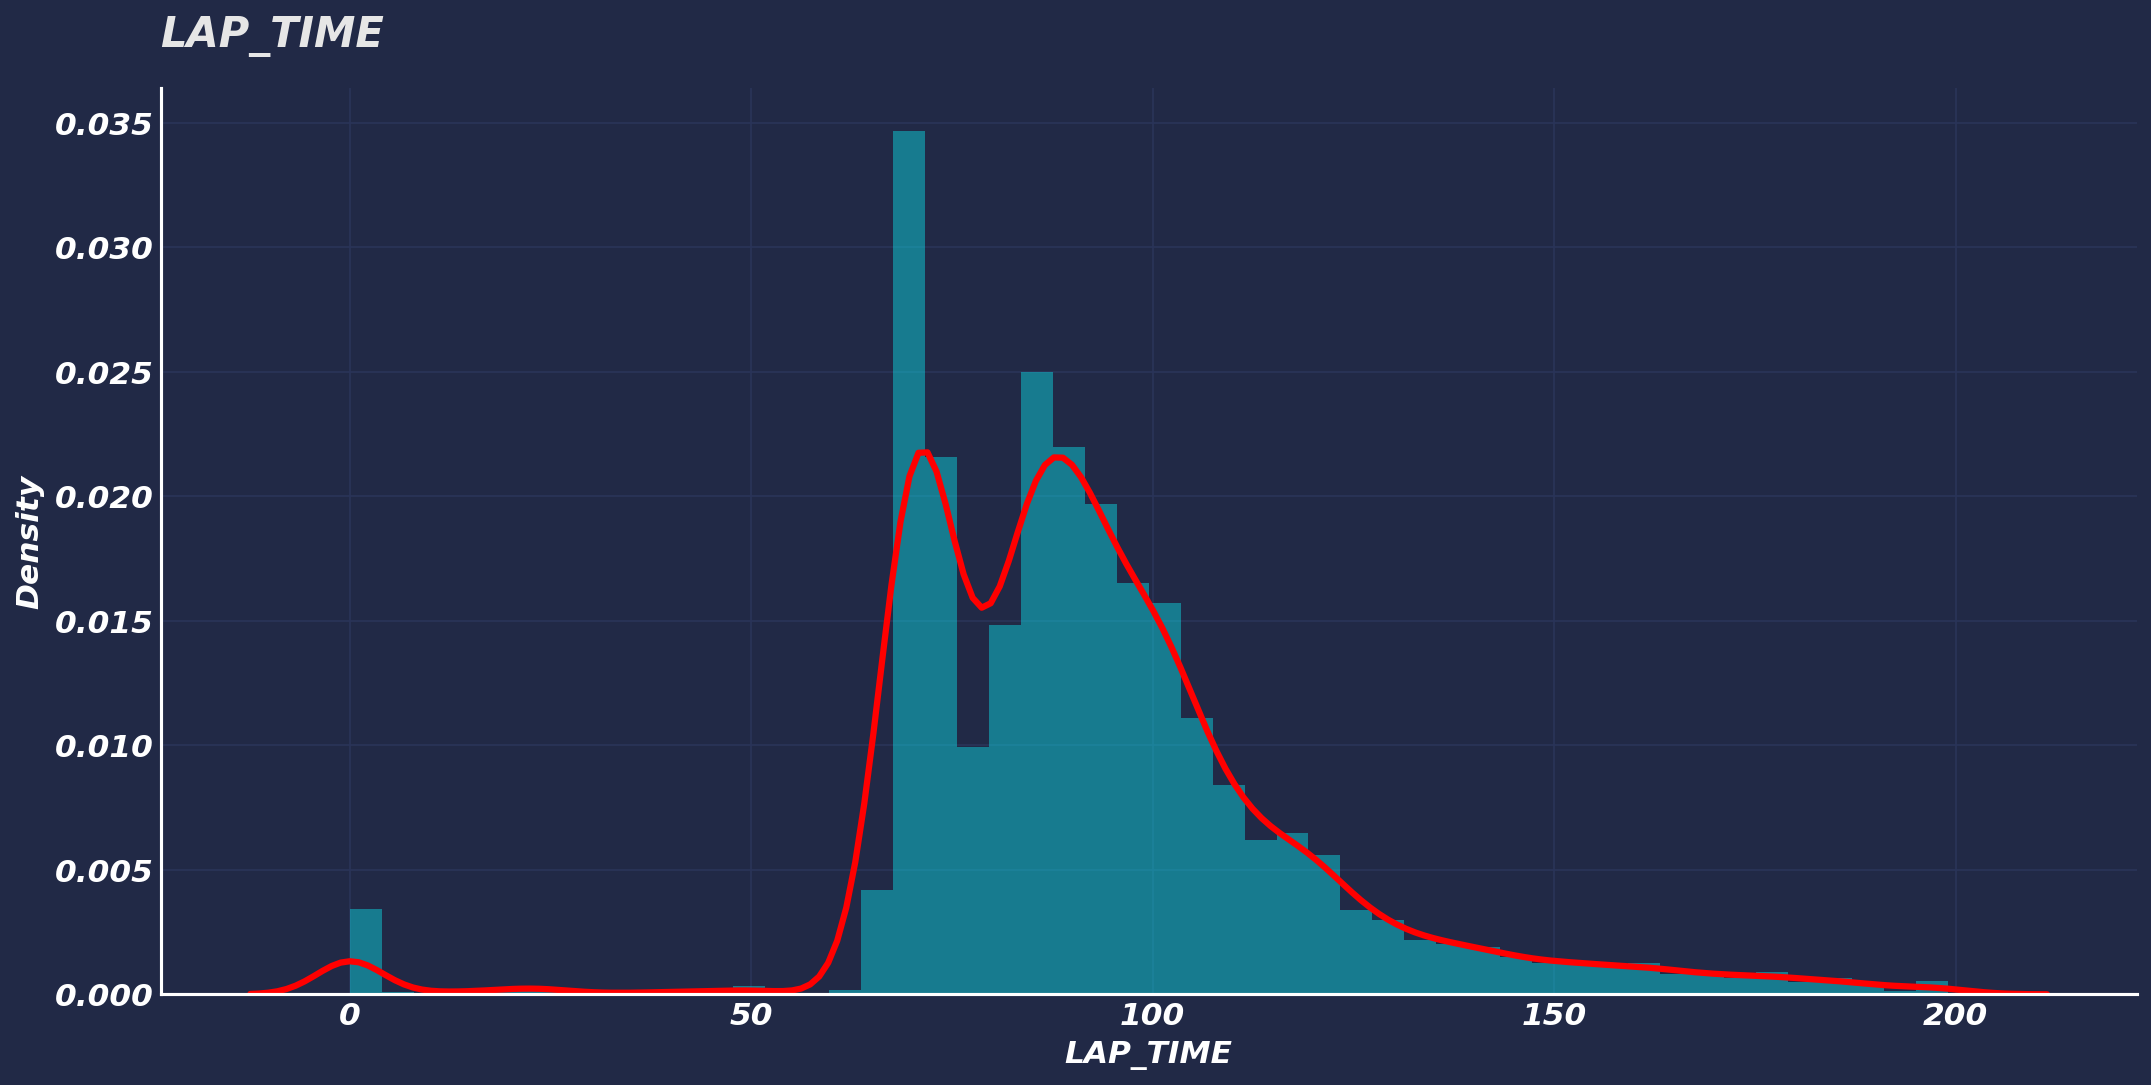

In [33]:
plt.figure(figsize=(17,8)) 

sns.distplot(train.LAP_TIME, kde_kws={"linewidth": 3,"color": "red"})
plt.title("LAP_TIME")

print(f"skew: {train.LAP_TIME.skew() }") 
print(f"Kurt: {train.LAP_TIME.kurt() }") 

Text(0.5, 0, 'LAP_TIME')

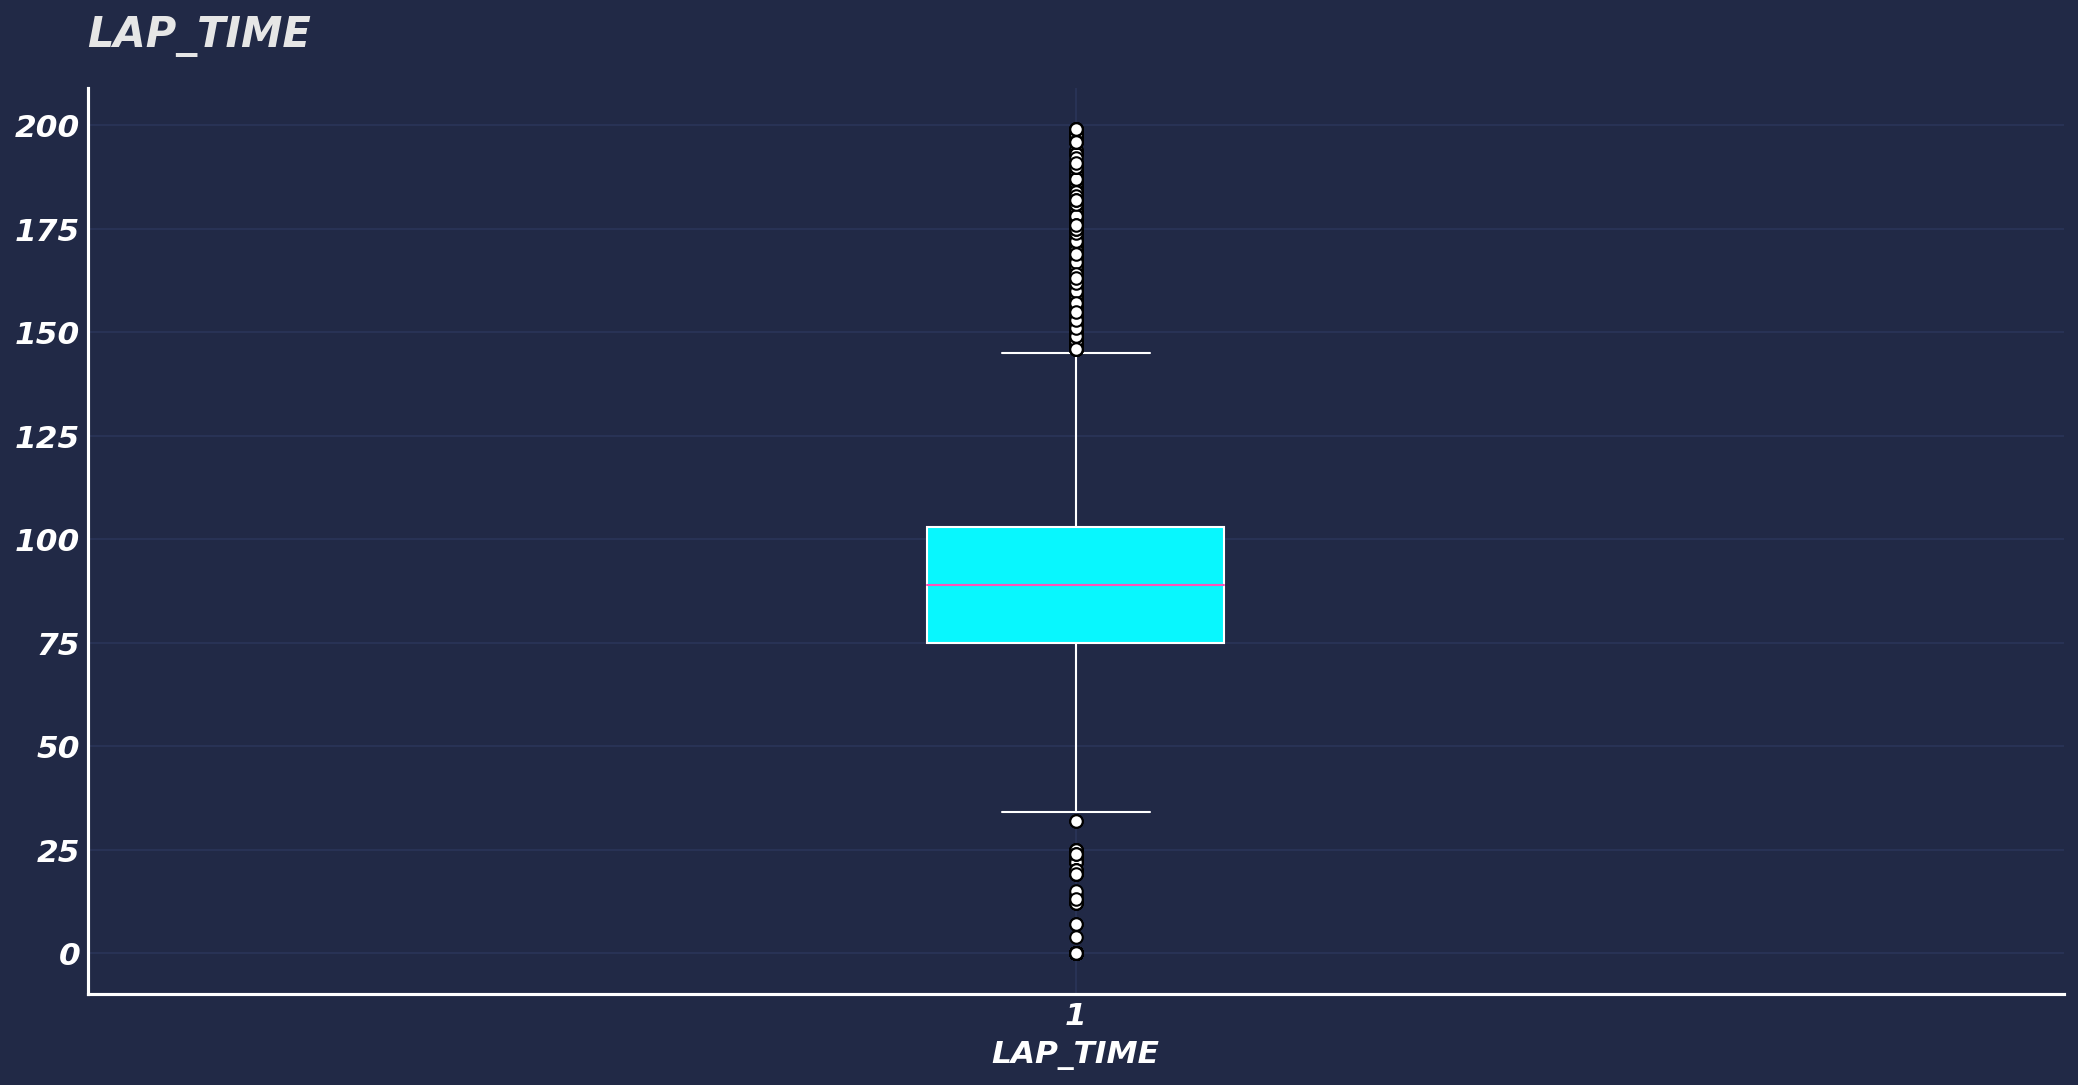

In [39]:
plt.figure(figsize=(17,8))

plt.boxplot(train.LAP_TIME,patch_artist=True)
plt.title("LAP_TIME") 
plt.xlabel("LAP_TIME") 

In [41]:
# filter lap time kurang dari 50
train.query("LAP_TIME < 50").LAP_TIME

50       48
273       0
662       0
675      19
922      40
         ..
10192    24
10205     0
10220    13
10229     0
10258     0
Name: LAP_TIME, Length: 194, dtype: int64

In [43]:
# filter lap time == 0
train.query("LAP_TIME == 0").LAP_TIME

273      0
662      0
1171     0
1728     0
1797     0
        ..
10180    0
10184    0
10205    0
10229    0
10258    0
Name: LAP_TIME, Length: 140, dtype: int64

In [ ]:
# berpikir untuk mengabungakan 2 data train & train_weather

In [32]:
train.shape

(10276, 25)

In [111]:
train.head(3)

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,S3,S3_IMPROVEMENT,KPH,ELAPSED,HOUR,S1_LARGE,S2_LARGE,S3_LARGE,DRIVER_NAME,PIT_TIME,GROUP,TEAM,POWER,LOCATION,EVENT
0,10,1,1,92,0,NaN,05:43.3,0,35.427,0,43.313,0,28.8,07:02.0,22:02.0,05:43.3,00:35.4,00:43.3,SB,05:14.7,NaN,JR,NaN,Location 2,Free Practice 2
1,10,1,2,87,2,NaN,25.674,2,33.399,2,41.922,2,120.5,08:43.0,23:43.0,00:25.7,00:33.4,00:41.9,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2
2,10,1,3,73,0,B,28.129,0,34.091,0,57.248,0,101.9,10:42.5,25:42.5,00:28.1,00:34.1,00:57.2,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2


In [112]:
# descriptive analysis of numeric feature train
train.describe()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,S1_IMPROVEMENT,S2_IMPROVEMENT,S3_IMPROVEMENT,KPH,GROUP,POWER
count,10276.000000,10276.0,10276.000000,10276.000000,10276.000000,10276.000000,10276.000000,10276.000000,10246.000000,508.000000,2903.000000
mean,32.379525,1.0,9.682951,92.670884,0.153464,0.151907,0.153854,0.154729,99.864981,2.557087,245.277299
std,28.226960,0.0,6.206700,26.206425,0.557103,0.554203,0.557869,0.560325,30.054048,1.122958,6.968022
min,4.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.400000,1.000000,235.000000
25%,11.000000,1.0,4.000000,75.000000,0.000000,0.000000,0.000000,0.000000,89.400000,2.000000,235.000000
50%,25.000000,1.0,9.000000,89.000000,0.000000,0.000000,0.000000,0.000000,109.900000,3.000000,250.000000
75%,37.000000,1.0,14.000000,103.000000,0.000000,0.000000,0.000000,0.000000,121.400000,4.000000,250.000000
max,99.000000,1.0,31.000000,199.000000,4.000000,4.000000,4.000000,4.000000,140.000000,4.000000,250.000000


In [113]:
# descriptive analysis of cater features train

train.describe(include="object") 

,CROSSING_FINISH_LINE_IN_PIT,S1,S2,S3,ELAPSED,HOUR,S1_LARGE,S2_LARGE,S3_LARGE,DRIVER_NAME,PIT_TIME,TEAM,LOCATION,EVENT
count,1234,10272,10268,10242,10276,10276,10272,10268,10242,10276,1898,10276,10276,10276
unique,1,7658,8368,8174,8359,8841,1371,474,894,24,1490,23,8,7
top,B,25.595,20.85,28.058,04:32.4,0:00,00:23.8,00:22.3,00:28.1,J,00:43.6,TAG,Location 8,Free Practice 1
freq,1234,6,5,7,6,30,141,100,118,651,7,935,1845,4396


In [5]:
# drop low freq feature 
drop = [" DRIVER_NUMBER"," CROSSING_FINISH_LINE_IN_PIT"]
for i in [train,test]: 
    i.drop(drop, axis=1, inplace=True) 

## train_weather + train

In [116]:
train_weather.head(3)

,TIME_UTC_SECONDS,TIME_UTC_STR,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,RAIN,LOCATION,EVENT
0,1618042506,2021-10-04 08:15:00,15,18.4,60,1018.05,2.12187,165,-1,Location 2,Free Practice 2
1,1618042567,2021-10-04 08:16:00,15.0556,18.4,60,1018.12,1.06093,177,-1,Location 2,Free Practice 2
2,1618042632,2021-10-04 08:17:00,15.0556,18.5,60,1018.12,2.12187,157,-1,Location 2,Free Practice 2


In [6]:
# time utc ubah ke format datetime 
for i in [train_weather, test_weather]: 
    i["TIME_UTC_STR"] = pd.to_datetime(i["TIME_UTC_STR"]) 

In [49]:
train_weather.TIME_UTC_STR.describe().to_frame() 

,TIME_UTC_STR
count,914
unique,914
top,2021-06-19 13:50:00
freq,1
first,2021-02-25 15:15:00
last,2021-11-07 13:57:00


In [44]:
# descriptive analysis of numeric feature train weather
train_weather.describe()

,TIME_UTC_SECONDS,WIND_DIRECTION
count,9.140000e+02,914.000000
mean,1.621089e+09,183.548140
std,4.275445e+06,119.596769
min,1.614266e+09,1.000000
25%,1.618050e+09,71.000000
50%,1.620455e+09,166.500000
75%,1.625918e+09,311.000000
max,1.627205e+09,360.000000


In [45]:
# descriptive analysis of cater features train_weather

train_weather.describe(include="object") 

,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,RAIN,LOCATION,EVENT
count,914,914,914,914,914,914,914,914
unique,371,271,151,283,134,6,7,7
top,12.9444,12,92,992.923,0,-1,Location 5,Free Practice 1
freq,20,29,49,14,206,795,155,312


In [7]:
cater_w = train_weather.select_dtypes("object").columns

In [57]:
# check kenapa column train weather type category

typo = []
for col in cater_w: 
    print("\n["+ col +"]\n") 
    for j in train_weather[col].unique():         
        try: 
            float(j)
        except ValueError: 
            s1_typo.append(j) 
            print(j) 


[AIR_TEMP]

19,32
19,2
19,25
19,11
19,22
19,33
19,24
19,05
20,1
20,02
19,74
19,76
19,75
19,83
19,66
19,64
2,04,444
20,5
2,05,556
1,60,556
1,61,111
1,61,667
1,62,222
1,62,778
1,63,333
1,64,444
16,5
1,66,667
1,67,222
1,68,333
1,68,889
1,69,444
1,70,556
1,71,667
1,72,222
1,72,778
1,73,889
1,74,444
1,75,556
1,76,111
1,76,667
1,77,778
1,78,333
1,78,889
1,79,444
1,80,556
1,81,111
1,81,667
1,82,222
1,82,778
1,83,333
1,83,889
2,06,667
2,12,222
2,12,778
2,13,333
2,08,333
22,444
2,29,444
17,25
17,3
17,11
17,12
17,19
17,32
17,4
17,52
17,48
17,41
17,53
17,46
17,36
17,47
17,68
17,59
17,49
17,37
17,39
17,38
17,42
17,27
17,34
17,31
18,81
18,83
18,88
20,89
20,8
20,72
20,67
20,52
20,64
20,85
20,71
20,62
20,77
20,82
20,98
21,03
20,93
20,97
20,88
20,79
20,59
20,33
20,29
20,24
20,23
20,51
20,84
20,81
20,57
20,38
20,26
20,32
20,45
20,31
20,28
20,08
20,03
20,09
19,98
19,99
18,82
18,98
19,01
18,65
18,7
18,77
18,73
18,95
18,8
18,75
18,87
18,68
18,76
18,71
18,66
18,64
18,61
1,84,444
18,5
1,85,556
1,86,111
1,8

In [8]:
cater_w[:6]

Index(['AIR_TEMP', 'TRACK_TEMP', 'HUMIDITY', 'PRESSURE', 'WIND_SPEED', 'RAIN'], dtype='object')

In [8]:
#ubah dari koma ke titik untuk mengubah type ke float

for i in cater_w[:6]:
    train_weather[i] = train_weather[i].str.replace(",",".")  
    

In [9]:
for i in cater_w[:6]:
    test_weather[i] = test_weather[i].str.replace(",",".")      
# sengaja di error karena ada bugs                            

AttributeError: Can only use .str accessor with string values!

In [21]:
test_weather.head()

,TIME_UTC_SECONDS,TIME_UTC_STR,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,RAIN,LOCATION,EVENTS
0,1628920823,2021-08-14 06:00:00,20.35,25.4,63.94,1016.46,1.18,203,0,Location 8,Free Practice 2
1,1628920883,2021-08-14 06:01:00,20.33,25.4,63.96,1016.48,10.83,204,0,Location 8,Free Practice 2
2,1628920943,2021-08-14 06:02:00,20.25,25.4,64.04,1016.48,12.53,201,0,Location 8,Free Practice 2
3,1628921003,2021-08-14 06:03:00,20.24,25.3,64.22,1016.49,2.28,198,0,Location 8,Free Practice 2
4,1628921063,2021-08-14 06:04:00,20.27,25.1,64.14,1016.5,11.28,204,0,Location 8,Free Practice 2


In [10]:
# bulatkan air temp 
for i in [train_weather,test_weather]:
    i["AIR_TEMP"] = i["AIR_TEMP"].str.split(".", expand=True)[0]

In [11]:
#bulatkaan track temp 
for i in [train_weather,test_weather]:
    i["TRACK_TEMP"] = i["TRACK_TEMP"].str.split(".", expand=True)[0]

In [12]:
#bulatkaan humidity
for i in [train_weather,test_weather]:
    i["HUMIDITY"] = i["HUMIDITY"].str.split(".", expand=True)[0]

In [13]:
#bulatkaan windspeed
for i in [train_weather,test_weather]:
    i["WIND_SPEED"] = i["WIND_SPEED"].str.split(".", expand=True)[0]

In [99]:
train_weather.RAIN.value_counts()

-1      795
0       113
0.01      3
0.25      1
0.02      1
0.03      1
Name: RAIN, dtype: int64

In [14]:
# ubah nilai dari rain 
for i in [train_weather, test_weather]: 
    i["RAIN"] = i["RAIN"].replace(["0.01", "0.25", "0.02", "0.03"], "0") 

In [18]:
# setelah perubahan 
train_weather.RAIN.value_counts()

-1    795
0     119
Name: RAIN, dtype: int64

In [15]:
# ubah type data ke int 

col= ["AIR_TEMP", "TRACK_TEMP", "HUMIDITY", "WIND_SPEED"]

for i in [train_weather, test_weather]: 
    i[col] = i[col].astype("int") 

In [143]:
train_weather.describe()

,TIME_UTC_SECONDS,AIR_TEMP,TRACK_TEMP,HUMIDITY,WIND_SPEED,WIND_DIRECTION
count,9.140000e+02,914.000000,914.000000,914.000000,914.000000,914.000000
mean,1.621089e+09,12.361050,21.746171,70.707877,4.967177,183.548140
std,4.275445e+06,7.291073,8.440314,17.531352,9.095876,119.596769
min,1.614266e+09,1.000000,10.000000,29.000000,0.000000,1.000000
25%,1.618050e+09,2.000000,15.000000,65.000000,1.000000,71.000000
50%,1.620455e+09,14.000000,19.000000,75.000000,2.000000,166.500000
75%,1.625918e+09,18.000000,28.000000,82.000000,5.000000,311.000000
max,1.627205e+09,25.000000,48.000000,95.000000,63.000000,360.000000


In [20]:
train_weather.sample(10)

,TIME_UTC_SECONDS,TIME_UTC_STR,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,RAIN,LOCATION,EVENT
477,1620463297,2021-08-05 08:41:00,19,20,69,1015.61,1,155,-1,Location 4,Free Practice 2
280,1626010250,2021-11-07 13:30:00,22,25,87,1016.46,0,269,-1,Location 6,Qualifying Group 1
895,1625935277,2021-10-07 16:41:00,2,35,76,1012.97,31,44,-1,Location 6,Qualifying Group 2
891,1625921090,2021-10-07 12:44:00,2,26,78,1011.28,31,17,-1,Location 6,Free Practice 1
707,1619243534,2021-04-24 05:52:00,13,14,82,998.104,1,347,-1,Location 3,Free Practice 1
446,1627122313,2021-07-24 10:25:00,18,17,85,1008.09,5,357,0,Location 7,Qualifying Group 3
681,1619241872,2021-04-24 05:24:00,12,14,86,997.664,1,26,-1,Location 3,Free Practice 1
735,1614337499,2021-02-26 11:04:00,20,34,34,937.352,9,309,-1,Location 1,Free Practice 2
786,1614267592,2021-02-25 15:39:00,17,19,45,937.014,5,243,-1,Location 1,Free Practice 1
271,1624209056,2021-06-20 17:10:00,2,45,70,7.76.634,4,234,-1,Location 5,Qualifying Group 2


In [16]:
#uabh nama column events ke event

test_weather = test_weather.rename(columns={"EVENTS":"EVENT"}) 

In [18]:
test_weather.head()

,TIME_UTC_SECONDS,TIME_UTC_STR,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,RAIN,LOCATION,EVENT
0,1628920823,2021-08-14 06:00:00,20,25,63,1016.46,1,203,0,Location 8,Free Practice 2
1,1628920883,2021-08-14 06:01:00,20,25,63,1016.48,10,204,0,Location 8,Free Practice 2
2,1628920943,2021-08-14 06:02:00,20,25,64,1016.48,12,201,0,Location 8,Free Practice 2
3,1628921003,2021-08-14 06:03:00,20,25,64,1016.49,2,198,0,Location 8,Free Practice 2
4,1628921063,2021-08-14 06:04:00,20,25,64,1016.5,11,204,0,Location 8,Free Practice 2


In [17]:
# gabung weather 
all_weather = pd.concat([train_weather,test_weather])
all_weather

,TIME_UTC_SECONDS,TIME_UTC_STR,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,RAIN,LOCATION,EVENT
0,1618042506,2021-10-04 08:15:00,15,18,60,1018.05,2,165,-1,Location 2,Free Practice 2
1,1618042567,2021-10-04 08:16:00,15,18,60,1018.12,1,177,-1,Location 2,Free Practice 2
2,1618042632,2021-10-04 08:17:00,15,18,60,1018.12,2,157,-1,Location 2,Free Practice 2
3,1618042697,2021-10-04 08:18:00,15,18,60,1018.08,2,163,-1,Location 2,Free Practice 2
4,1618042762,2021-10-04 08:19:00,15,18,60,1018.15,3,149,-1,Location 2,Free Practice 2
...,...,...,...,...,...,...,...,...,...,...,...
162,1629021436,2021-08-15 09:57:00,24,34,46,1010.14,9,204,0,Location 8,Qualifying Group 4
163,1629020775,2021-08-15 09:46:00,24,35,46,1010.38,6,208,0,Location 8,Qualifying Group 3
164,1629020835,2021-08-15 09:47:00,24,35,46,1010.33,5,214,0,Location 8,Qualifying Group 3
165,1629020895,2021-08-15 09:48:00,24,35,45,1010.32,9,219,0,Location 8,Qualifying Group 3


In [18]:
# tambahkan feature median & mode (air temp,track temp,humidity,wind speed,wind direction,rain)
# berdasarkan location 

air_temp = all_weather.groupby(["LOCATION"])["AIR_TEMP"].median().to_dict() 
track_temp = all_weather.groupby(["LOCATION"])["TRACK_TEMP"].median().to_dict() 
humidity = all_weather.groupby(["LOCATION"])["HUMIDITY"].median().to_dict() 
wind_speed = all_weather.groupby(["LOCATION"])["WIND_SPEED"].median().to_dict() 
wind_direction = all_weather.groupby(["LOCATION"])["WIND_DIRECTION"].median().to_dict() 
rain = all_weather.groupby(["LOCATION"])["RAIN"].apply(lambda x: x.mode()[0]).to_dict() 

In [19]:
# buat variable baru di train/test

for i in [train,test]:
    i["AIR_TEMP"] = i[["LOCATION"]].apply(lambda x: x.map(air_temp)) 
    i["TRACK_TEMP"] = i[["LOCATION"]].apply(lambda x: x.map(track_temp)) 
    i["HUMIDITY"] = i[["LOCATION"]].apply(lambda x: x.map(humidity)) 
    i["WIND_SPEED"] = i[["LOCATION"]].apply(lambda x: x.map(wind_speed)) 
    i["WIND_DIRECTION"] = i[["LOCATION"]].apply(lambda x: x.map(wind_direction)) 
    i["RAIN"] = i[["LOCATION"]].apply(lambda x: x.map(rain)) 


In [20]:
train.head()

,NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,S3,S3_IMPROVEMENT,KPH,ELAPSED,HOUR,S1_LARGE,S2_LARGE,S3_LARGE,DRIVER_NAME,PIT_TIME,GROUP,TEAM,POWER,LOCATION,EVENT,AIR_TEMP,TRACK_TEMP,HUMIDITY,WIND_SPEED,WIND_DIRECTION,RAIN
0,10,1,92,0,05:43.3,0,35.427,0,43.313,0,28.8,07:02.0,22:02.0,05:43.3,00:35.4,00:43.3,SB,05:14.7,NaN,JR,NaN,Location 2,Free Practice 2,12,12,65,2,149.0,-1
1,10,2,87,2,25.674,2,33.399,2,41.922,2,120.5,08:43.0,23:43.0,00:25.7,00:33.4,00:41.9,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2,12,12,65,2,149.0,-1
2,10,3,73,0,28.129,0,34.091,0,57.248,0,101.9,10:42.5,25:42.5,00:28.1,00:34.1,00:57.2,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2,12,12,65,2,149.0,-1
3,11,1,73,0,01:05.0,0,38.416,0,56.833,0,75.9,02:40.2,17:40.2,01:05.0,00:38.4,00:56.8,LGRA,00:33.0,NaN,AD,NaN,Location 2,Free Practice 2,12,12,65,2,149.0,-1
4,11,2,73,0,28.013,0,36.743,0,44.716,0,111.2,04:29.7,19:29.7,00:28.0,00:36.7,00:44.7,LGRA,NaN,NaN,AD,NaN,Location 2,Free Practice 2,12,12,65,2,149.0,-1


In [ ]:
# pisahkan numeric & categorical


In [21]:

cater = train.select_dtypes(exclude="number").columns
number = train.select_dtypes("number").columns

## Categorical features

In [26]:
train[cater].describe()

,S1,S2,S3,ELAPSED,HOUR,S1_LARGE,S2_LARGE,S3_LARGE,DRIVER_NAME,PIT_TIME,TEAM,LOCATION,EVENT,RAIN
count,10272,10268,10242,10276,10276,10272,10268,10242,10276,1898,10276,10276,10276,10276
unique,7658,8368,8174,8359,8841,1371,474,894,24,1490,23,8,7,3
top,25.595,22.364,28.058,04:32.4,0:00,00:23.8,00:22.3,00:28.1,J,00:43.6,TAG,Location 8,Free Practice 1,-1
freq,6,5,7,6,30,141,100,118,651,7,935,1845,4396,7524


## s1 s2 s3

In [54]:
train[[" S1"," S2"," S3"]].sample(10)

,S1,S2,S3
8482,23.923,21.552,23.403
335,37.319,48.393,52.475
5301,29.261,40.565,37.385
2061,28.035,29.61,03:03.3
8771,28.189,25.715,24.31
2050,27.714,31.013,28.595
6815,22.944,18.744,29.387
387,26.571,34.622,44.114
3153,28.994,40.106,53.414
8086,33.889,32.371,21.372


In [22]:
# drop s1 s2 s3 karena sama dengan s_large 

s = [" S1", " S2", " S3"]
for i in [train, test]: 
    i.drop(s, axis=1, inplace=True) 

## ELAPSED

In [60]:
#elapsed == round(s_large)

train[" ELAPSED"]

0        07:02.0
1        08:43.0
2        10:42.5
3        02:40.2
4        04:29.7
          ...   
10271    23:54.7
10272    25:11.0
10273    28:15.1
10274    29:22.3
10275    30:31.5
Name:  ELAPSED, Length: 10276, dtype: object

## driver name

In [61]:
train.DRIVER_NAME.value_counts()

J          651
PWEHRL     475
NVR        470
ALOTTE     460
ACO        457
NN         456
TB         455
SVANDOO    448
OROWL      441
EMORT      438
M¬úNT      435
SBU        434
OTUR       433
JVER       426
MEV        425
LGRA       416
AL         413
RR         405
SB         400
N          394
AS         388
S¬ÇM       383
RFRI       379
N¬úL       194
Name: DRIVER_NAME, dtype: int64

In [66]:
# rata-rata lap time berdasarkan drivername

train.groupby("DRIVER_NAME")["LAP_TIME"].mean().to_frame().sort_values("LAP_TIME").style.bar(subset="LAP_TIME", color="red") 

,LAP_TIME
DRIVER_NAME,
ALOTTE,90.356522
SVANDOO,90.444196
MEV,90.508235
NN,91.043860
J,91.210445
M¬úNT,91.404598
AS,91.719072
S¬ÇM,91.723238
PWEHRL,91.747368


## pit time

In [23]:
# filter nan & count nan 

cnan = np.where(train["PIT_TIME"].isnull(),0,1)

In [92]:

np.unique(cnan, return_counts=True)

#output
# 0 == 8378 tidak ke pit 
# 1 == 1898 ke pit 

(array([0, 1]), array([8378, 1898]))

In [23]:
# buat feature baru pit? 

for i in [train,test]:
    i["PIT?"] = np.where(i.PIT_TIME.isnull(), "no", "yes") 

In [25]:
train["PIT?"].value_counts()

no     8378
yes    1898
Name: PIT?, dtype: int64

,LAP_TIME
PIT?,
no,92.523156
yes,93.322972


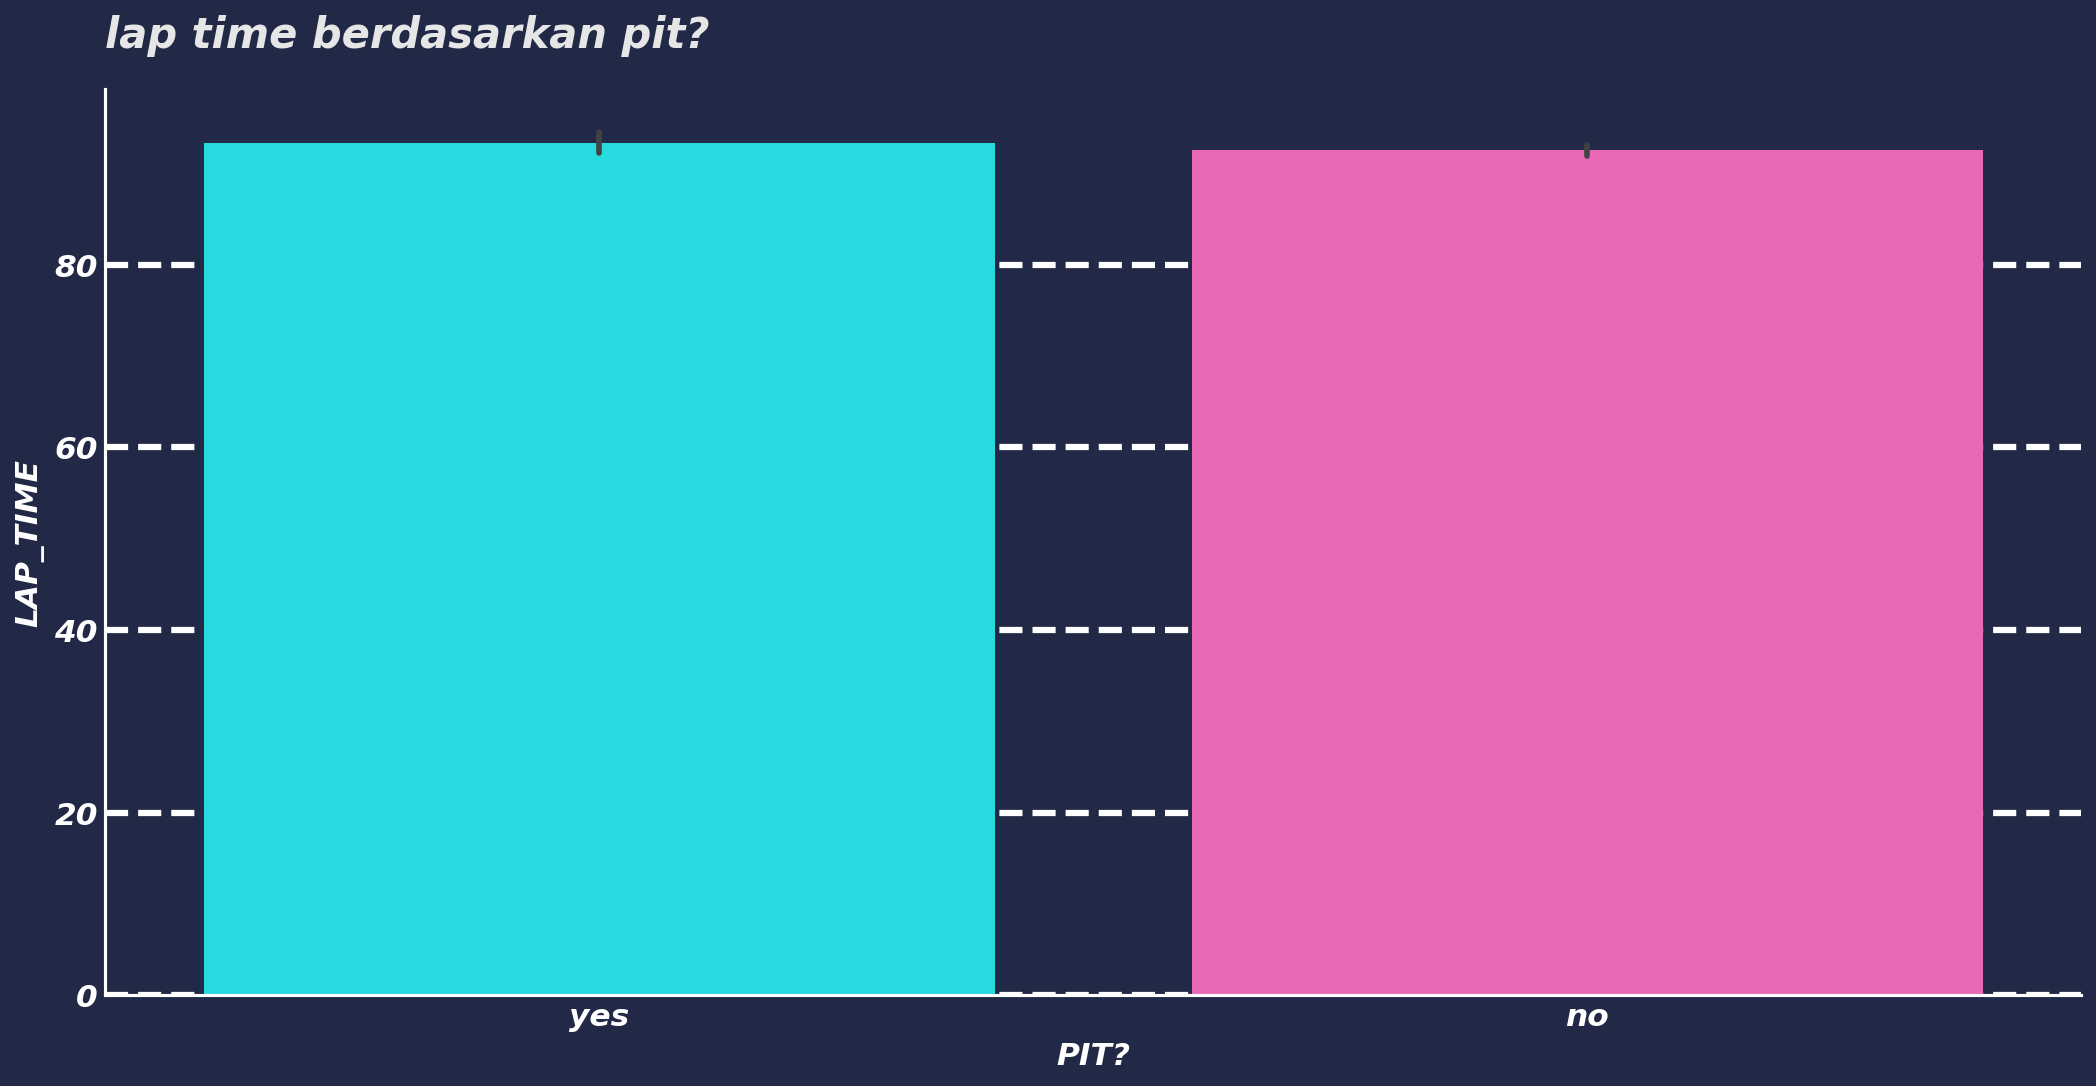

In [103]:
plt.figure(figsize=(17,8))

sns.barplot(x="PIT?", y="LAP_TIME",data=train)
plt.grid(axis="y", linestyle="--", linewidth=3, color="white") 
plt.title("lap time berdasarkan pit?") 

train.groupby("PIT?")["LAP_TIME"].mean().to_frame() 

In [24]:
# drop pit time 
for i in [train,test]:
    i.drop("PIT_TIME", axis=1, inplace=True) 

## TEAM

In [108]:
train.TEAM.value_counts().to_frame().style.bar("TEAM", color="red") 

,TEAM
TAG,935
MAHINDRAd,801
ME,470
DSo,457
ROK,456
NIOO,455
Ml,448
N,441
BMWE,438
ROKo,438


In [109]:
# rata² lap time berdasarakn team 

train.groupby("TEAM")["LAP_TIME"].mean().sort_values().to_frame().style.bar("LAP_TIME", color="red") 

,LAP_TIME
TEAM,
DRAGONR,89.816901
Ml,90.444196
JE,90.508235
ROK,91.043860
TAG,91.063102
BMWl,91.404598
DRAGONo,91.723238
BMWE,91.888128
ROKo,91.979452


## LOCATION

In [111]:
train.LOCATION.value_counts().sort_index() 

Location 1    1556
Location 2    1075
Location 3    1443
Location 4     778
Location 5    1319
Location 6    1353
Location 7     907
Location 8    1845
Name: LOCATION, dtype: int64

Text(0.0, 1.0, 'Location distribution')

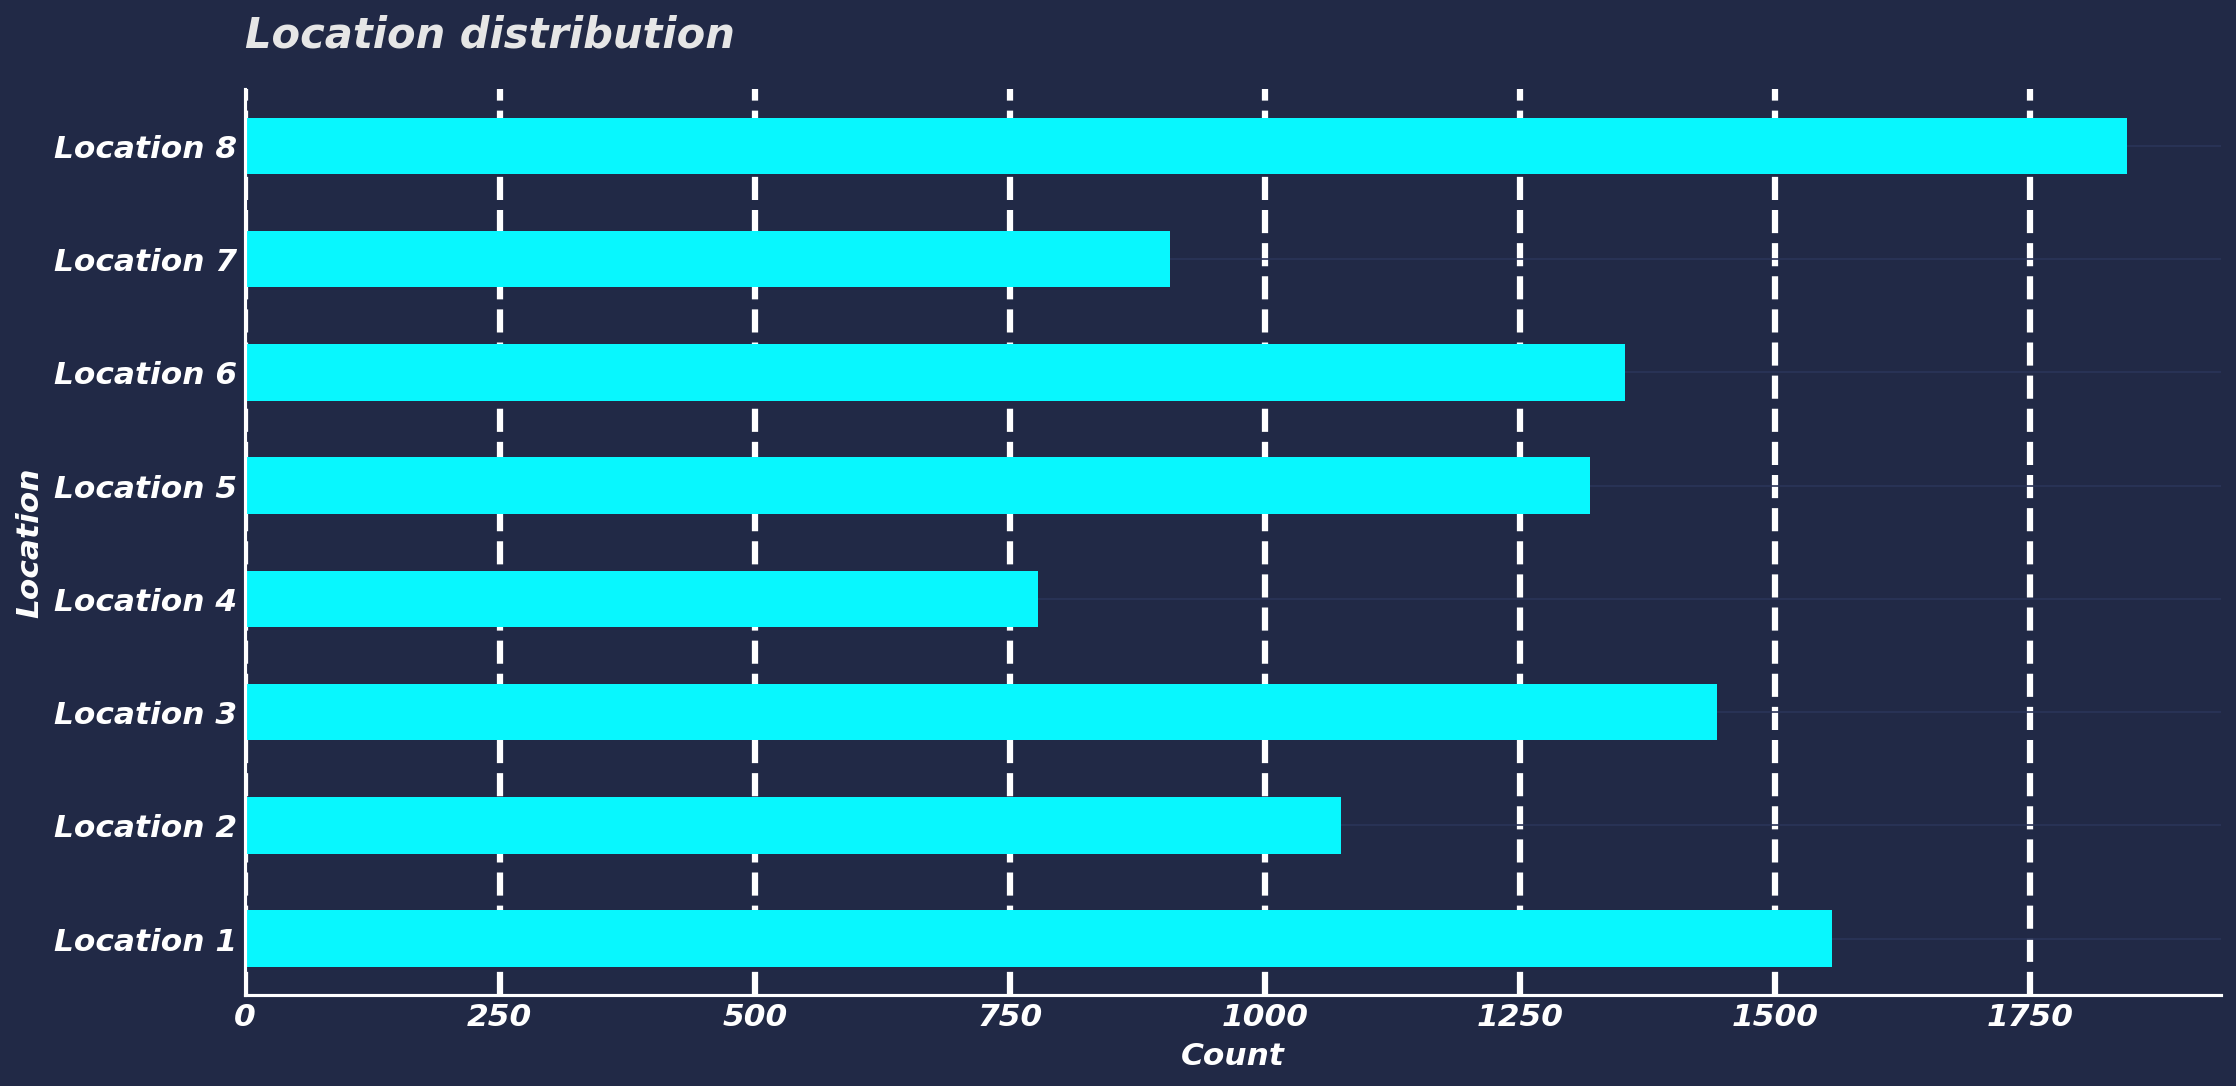

In [114]:
# plot
train.LOCATION.value_counts().sort_index().plot(kind="barh",figsize=(17,8))
plt.grid(axis="x", linewidth=3, linestyle="--", color="white") 
plt.xlabel("Count") 
plt.ylabel("Location")
plt.title("Location distribution") 
# index berdasarkan location 

In [115]:
# rata² lap time berdasarakn location

train.groupby("LOCATION")["LAP_TIME"].mean().sort_values().to_frame().style.bar("LAP_TIME", color="red") 

,LAP_TIME
LOCATION,
Location 8,74.492683
Location 4,95.706941
Location 3,96.060291
Location 5,96.062926
Location 2,96.669767
Location 1,97.190874
Location 7,97.212789
Location 6,97.371766


## EVENT

In [116]:
train.EVENT.value_counts()

Free Practice 1       4396
Free Practice 2       2981
Free Practice 3       2391
Qualifying Group 4     137
Qualifying Group 3     129
Qualifying Group 2     122
Qualifying Group 1     120
Name: EVENT, dtype: int64

Text(0.0, 1.0, 'Event distribution')

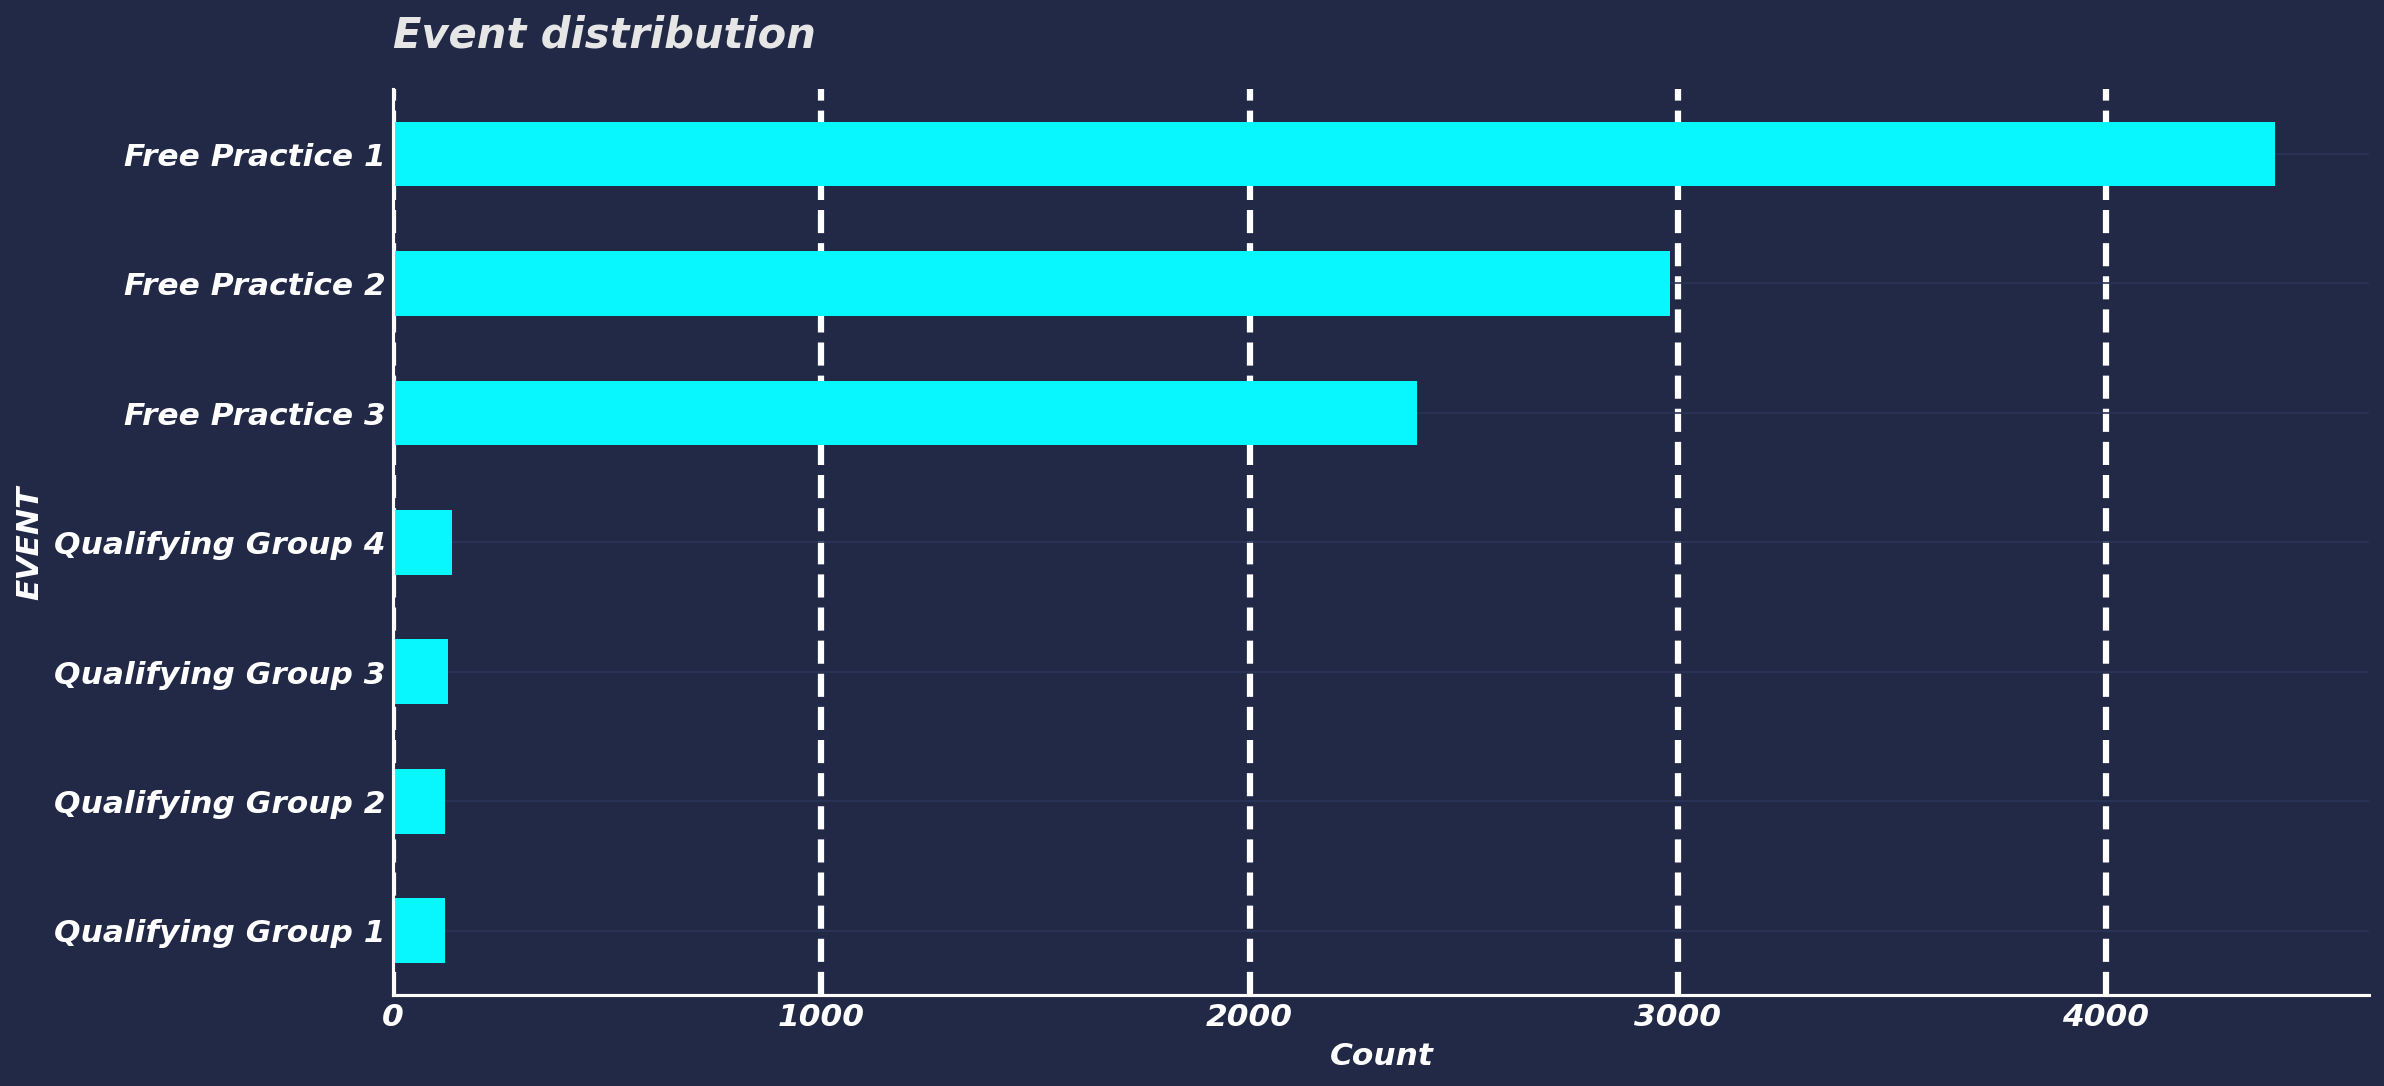

In [118]:
# plot
train.EVENT.value_counts().sort_values().plot(kind="barh",figsize=(17,8))
plt.grid(axis="x", linewidth=3, linestyle="--", color="white") 
plt.xlabel("Count") 
plt.ylabel("EVENT")
plt.title("Event distribution") 

In [117]:
# rata² lap time berdasarakn EVENT

train.groupby("EVENT")["LAP_TIME"].mean().sort_values().to_frame().style.bar("LAP_TIME", color="red") 

,LAP_TIME
EVENT,
Free Practice 2,90.637035
Free Practice 1,91.474977
Qualifying Group 3,96.023256
Qualifying Group 4,96.218978
Free Practice 3,96.386449
Qualifying Group 2,98.901639
Qualifying Group 1,98.983333


## RAIN

In [127]:
train.RAIN.value_counts() 

-1    7524
0     1845
0      907
Name: RAIN, dtype: int64

In [128]:
train.RAIN.unique()

array(['-1', '0', 0], dtype=object)

In [25]:
# ubah format 

for i in [train, test]: 
    i["RAIN"] = i["RAIN"].replace(0, "0") 

In [29]:
# after fillna 
train.RAIN.value_counts() 

-1    7524
0     2752
Name: RAIN, dtype: int64

Text(0.0, 1.0, 'Rain distribution')

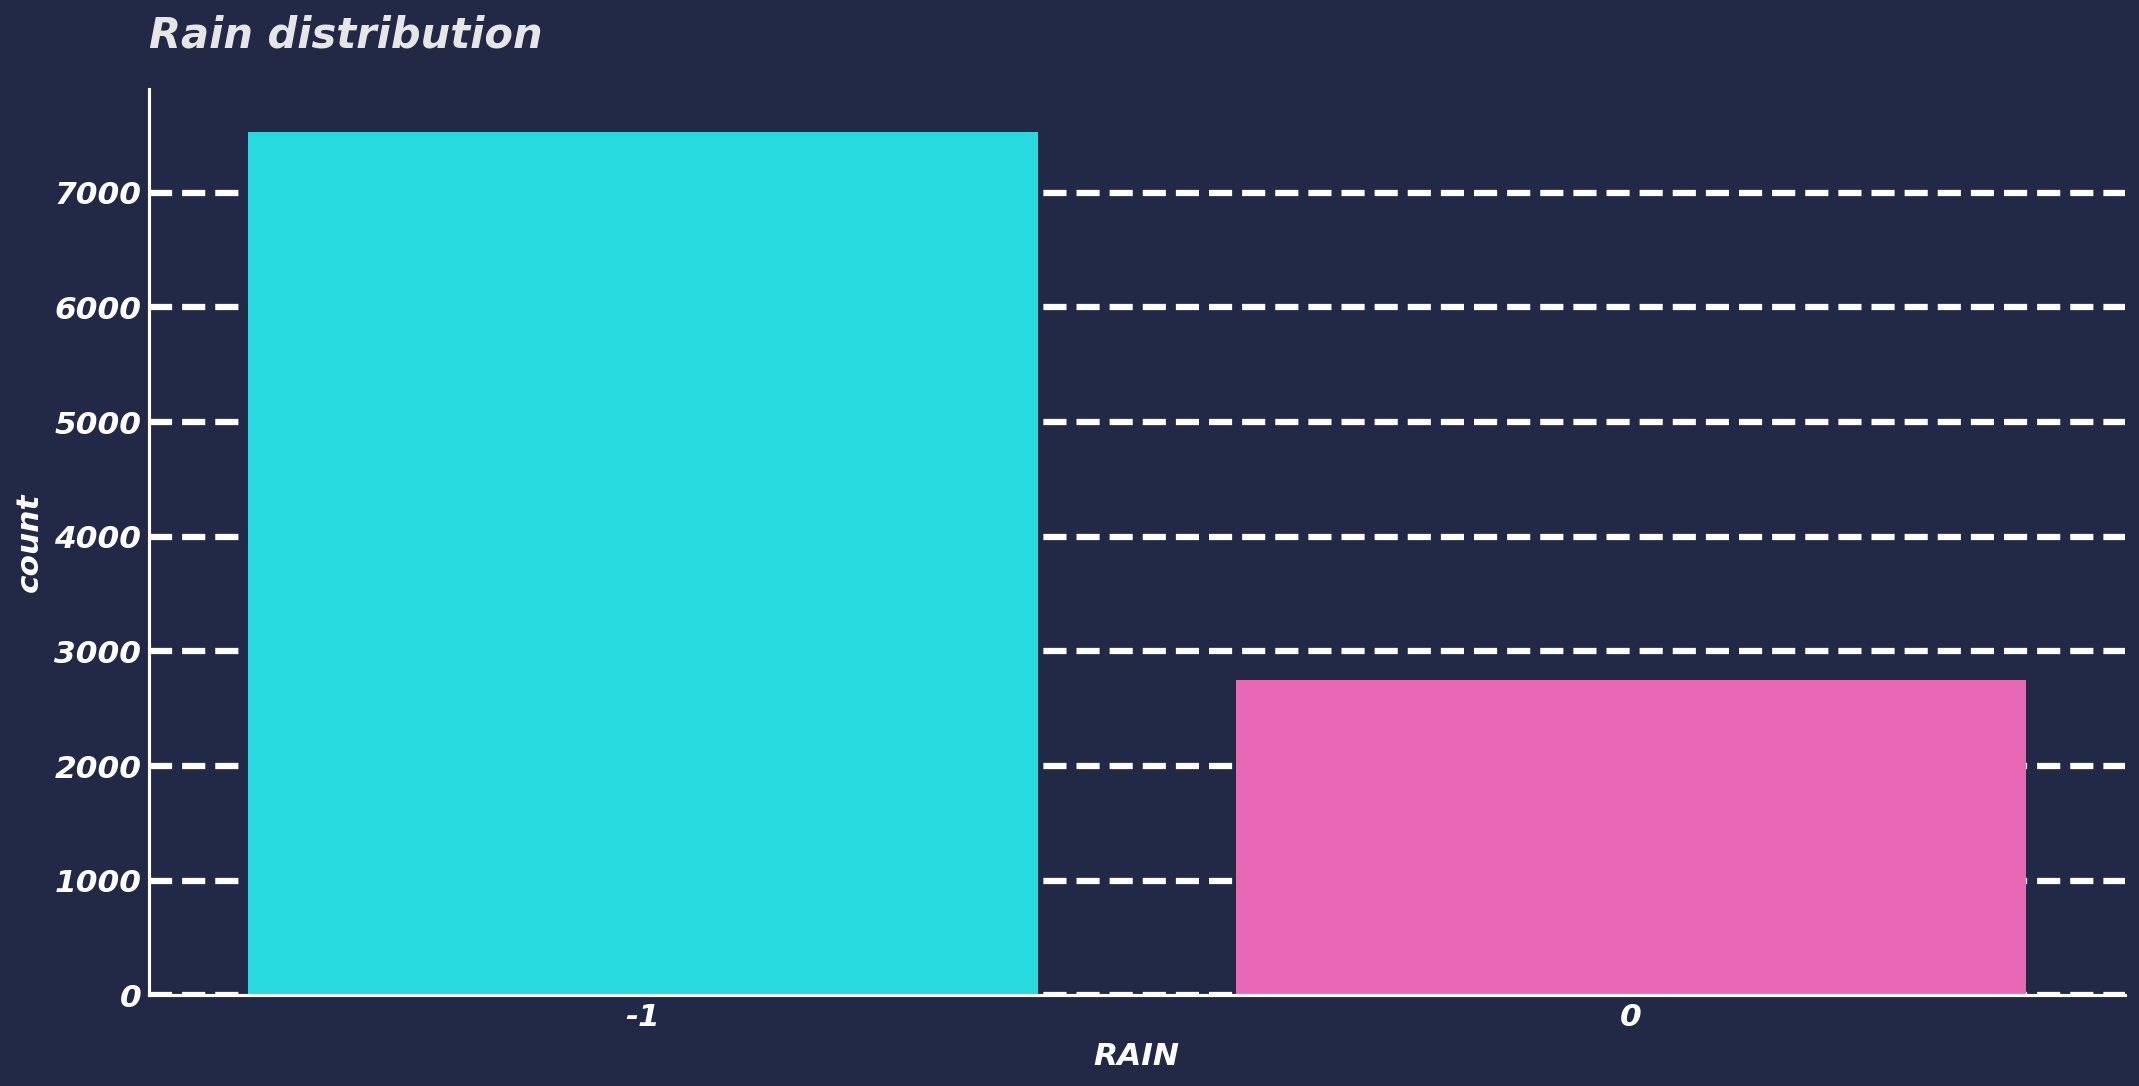

In [136]:
plt.figure(figsize=(17,8))

sns.countplot(train.RAIN) 
plt.grid(axis="y", linewidth=3, linestyle="--", color="white") 
plt.title("Rain distribution") 

,LAP_TIME
RAIN,
-1,96.580941
0,81.980741


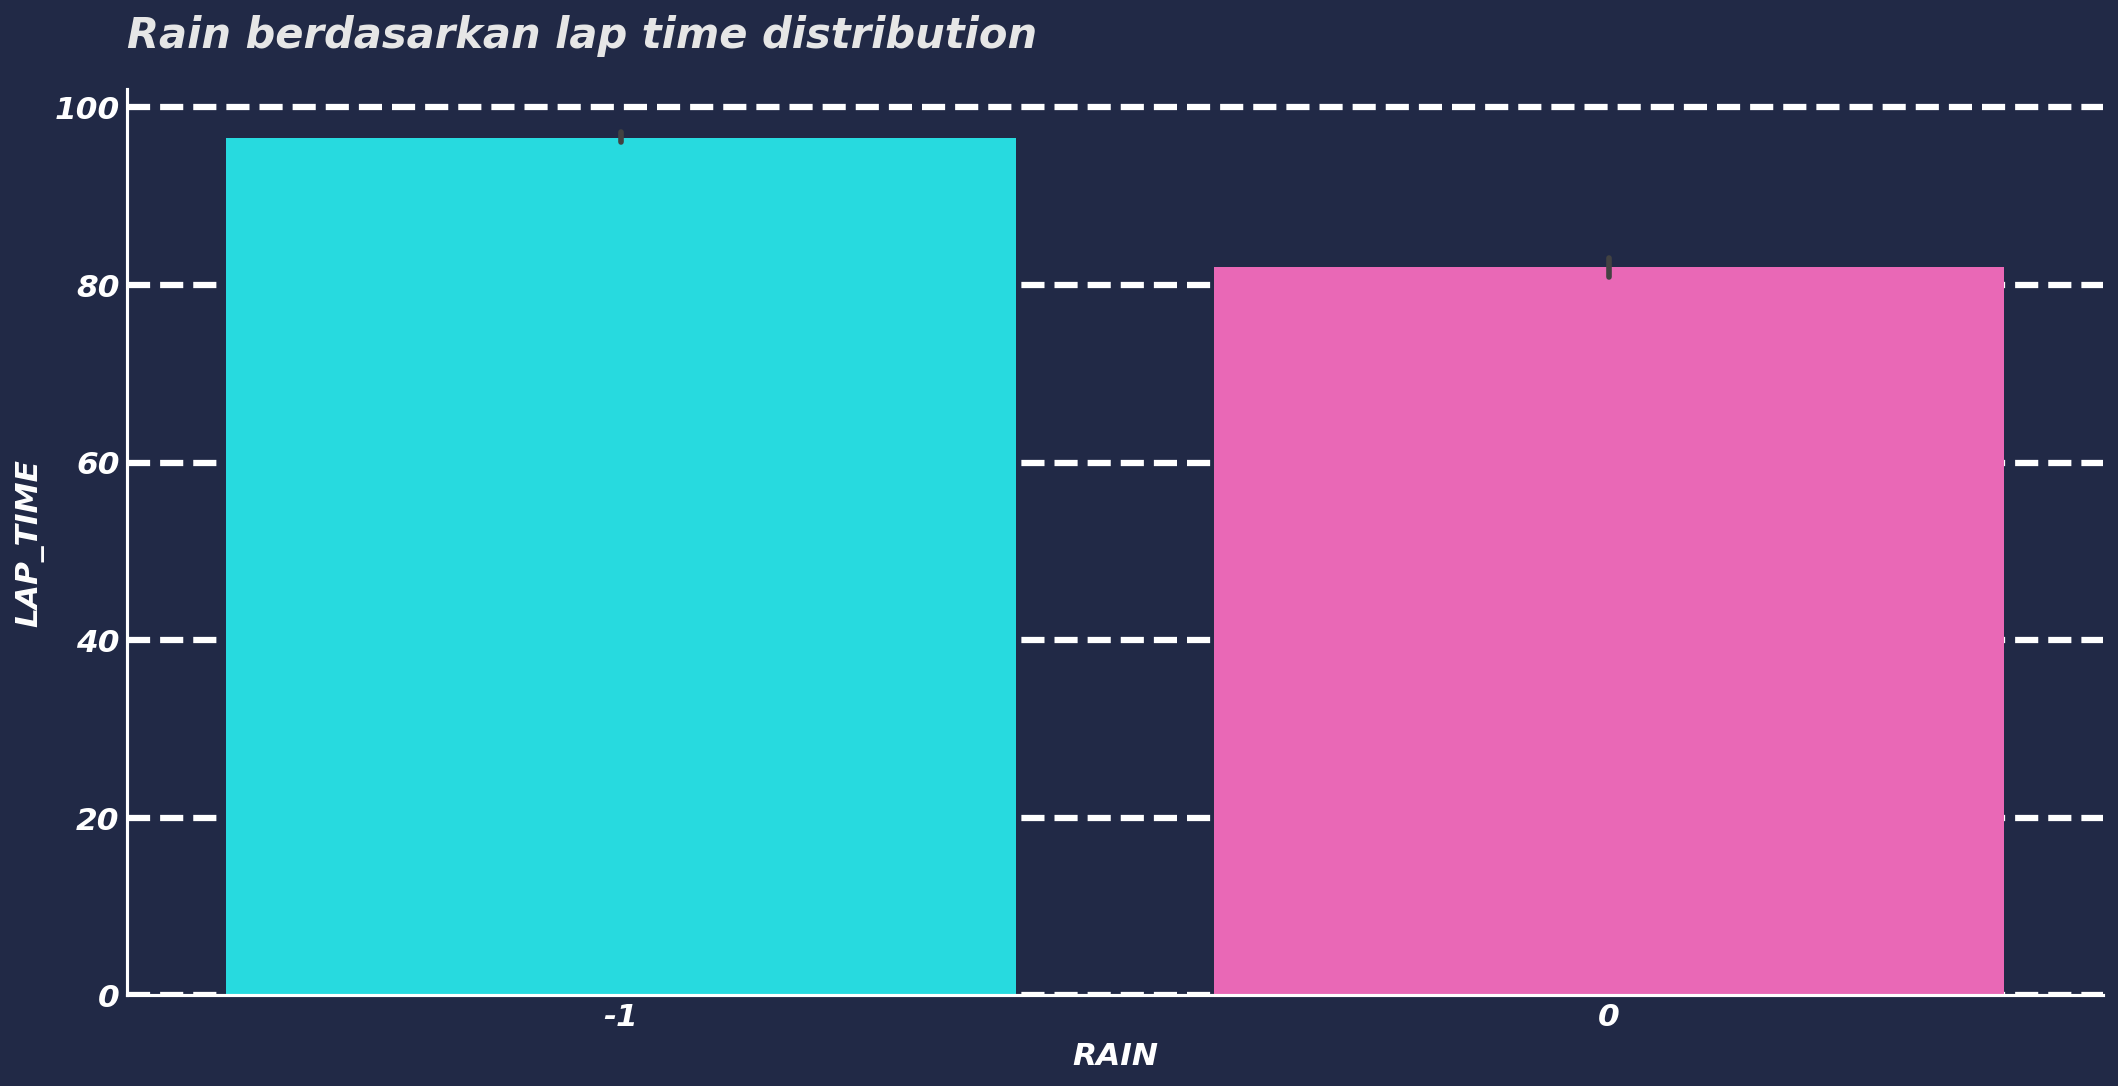

In [139]:
plt.figure(figsize=(17,8))

sns.barplot(x = train.RAIN,y=train.LAP_TIME) 
plt.grid(axis="y", linewidth=3, linestyle="--", color="white") 
plt.title("Rain berdasarkan lap time distribution") 

train.groupby("RAIN")["LAP_TIME"].mean().to_frame() 

## numerical features

In [28]:
train[number].describe()

,NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,S1_IMPROVEMENT,S2_IMPROVEMENT,S3_IMPROVEMENT,KPH,GROUP,POWER,AIR_TEMP,TRACK_TEMP,HUMIDITY,WIND_SPEED,WIND_DIRECTION
count,10276.000000,10276.000000,10276.000000,10276.000000,10276.000000,10276.000000,10276.000000,10246.000000,508.000000,2903.000000,10276.000000,10276.000000,10276.00000,10276.000000,10276.000000
mean,32.379525,9.682951,92.670884,0.153464,0.151907,0.153854,0.154729,99.864981,2.557087,245.277299,13.462631,22.899475,66.99455,3.162028,207.362982
std,28.226960,6.206700,26.206425,0.557103,0.554203,0.557869,0.560325,30.054048,1.122958,6.968022,7.782260,6.424445,17.19387,2.441156,72.165721
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.400000,1.000000,235.000000,1.000000,12.000000,33.00000,0.000000,75.000000
25%,11.000000,4.000000,75.000000,0.000000,0.000000,0.000000,0.000000,89.400000,2.000000,235.000000,2.000000,19.000000,57.00000,1.000000,155.000000
50%,25.000000,9.000000,89.000000,0.000000,0.000000,0.000000,0.000000,109.900000,3.000000,250.000000,13.000000,26.000000,70.00000,3.000000,204.000000
75%,37.000000,14.000000,103.000000,0.000000,0.000000,0.000000,0.000000,121.400000,4.000000,250.000000,21.000000,29.000000,81.00000,5.000000,297.500000
max,99.000000,31.000000,199.000000,4.000000,4.000000,4.000000,4.000000,140.000000,4.000000,250.000000,21.000000,29.000000,85.00000,9.000000,312.000000


In [ ]:
## Number

In [29]:
train.NUMBER.value_counts()

99    475
17    470
36    460
13    457
71    456
88    455
5     448
22    441
48    438
27    438
28    435
23    434
8     433
25    426
20    425
11    416
94    413
6     407
33    405
10    400
37    394
29    388
7     383
4     379
Name: NUMBER, dtype: int64

In [31]:
# psriksa number & driver name
train.groupby("DRIVER_NAME")["NUMBER"].value_counts().to_frame() 

NUMBER
DRIVER_NAME NUMBER        
ACO         13         457
AL          94         413
ALOTTE      36         460
AS          29         388
EMORT       48         438
J           27         438
            6          213
JVER        25         426
LGRA        11         416
MEV         20         425
M¬úNT       28         435
N           37         394
NN          71         456
NVR         17         470
N¬úL        6          194
OROWL       22         441
OTUR        8          433
PWEHRL      99         475
RFRI        4          379
RR          33         405
SB          10         400
SBU         23         434
SVANDOO     5          448
S¬ÇM        7          383
TB          88         455

In [31]:
# gabungkan driver name & number

driver = train["DRIVER_NAME"] +"_"+ train["NUMBER"].astype(str) 

In [33]:
driver.describe()

count         10276
unique           25
top       PWEHRL_99
freq            475
dtype: object

In [32]:
driver.value_counts()

PWEHRL_99    475
NVR_17       470
ALOTTE_36    460
ACO_13       457
NN_71        456
TB_88        455
SVANDOO_5    448
OROWL_22     441
J_27         438
EMORT_48     438
M¬úNT_28     435
SBU_23       434
OTUR_8       433
JVER_25      426
MEV_20       425
LGRA_11      416
AL_94        413
RR_33        405
SB_10        400
N_37         394
AS_29        388
S¬ÇM_7       383
RFRI_4       379
J_6          213
N¬úL_6       194
dtype: int64

In [34]:
# rata² lap time berdasarakn driver 

train.groupby(driver)["LAP_TIME"].mean().sort_values().to_frame().style.bar("LAP_TIME", color="red") 

,LAP_TIME
J_6,89.816901
ALOTTE_36,90.356522
SVANDOO_5,90.444196
MEV_20,90.508235
NN_71,91.043860
M¬úNT_28,91.404598
AS_29,91.719072
S¬ÇM_7,91.723238
PWEHRL_99,91.747368
J_27,91.888128


In [26]:
# buat feature baru driver 

for i in [train, test]: 
    i["DRIVER"] = i["DRIVER_NAME"] +"_"+ i["NUMBER"].astype(str) 

In [27]:
#drop driver name & number 

for i in [train, test]: 
    i.drop(["DRIVER_NAME", "NUMBER"], axis=1, inplace=True) 

## lap number

In [40]:
train[" LAP_NUMBER"].value_counts() 

1     755
2     752
3     636
4     544
5     541
6     533
7     523
8     521
9     520
10    519
11    516
12    514
13    500
14    476
15    440
16    400
17    345
18    296
19    231
20    178
21    144
22    111
23     90
24     67
25     49
26     30
27     20
28     13
29      7
30      4
31      1
Name:  LAP_NUMBER, dtype: int64

In [43]:
# rata² lap number berdasarakn driver 

train.groupby(" LAP_NUMBER")["LAP_TIME"].mean().sort_values().to_frame().style.bar("LAP_TIME", color="red") 

,LAP_TIME
LAP_NUMBER,
30,79.250000
29,81.428571
28,82.384615
31,83.000000
26,88.433333
18,89.459459
23,89.911111
21,90.076389
19,90.701299


## all improvement

In [46]:
train[" S1_IMPROVEMENT"].value_counts()

0    9534
2     685
3      37
4      20
Name:  S1_IMPROVEMENT, dtype: int64

In [51]:
train[" LAP_IMPROVEMENT"].value_counts()

0    9527
2     690
3      39
4      20
Name:  LAP_IMPROVEMENT, dtype: int64

In [53]:
train[" S2_IMPROVEMENT"].value_counts()

0    9525
2     693
3      37
4      21
Name:  S2_IMPROVEMENT, dtype: int64

In [54]:
train[" S3_IMPROVEMENT"].value_counts()

0    9522
2     695
3      36
4      23
Name:  S3_IMPROVEMENT, dtype: int64

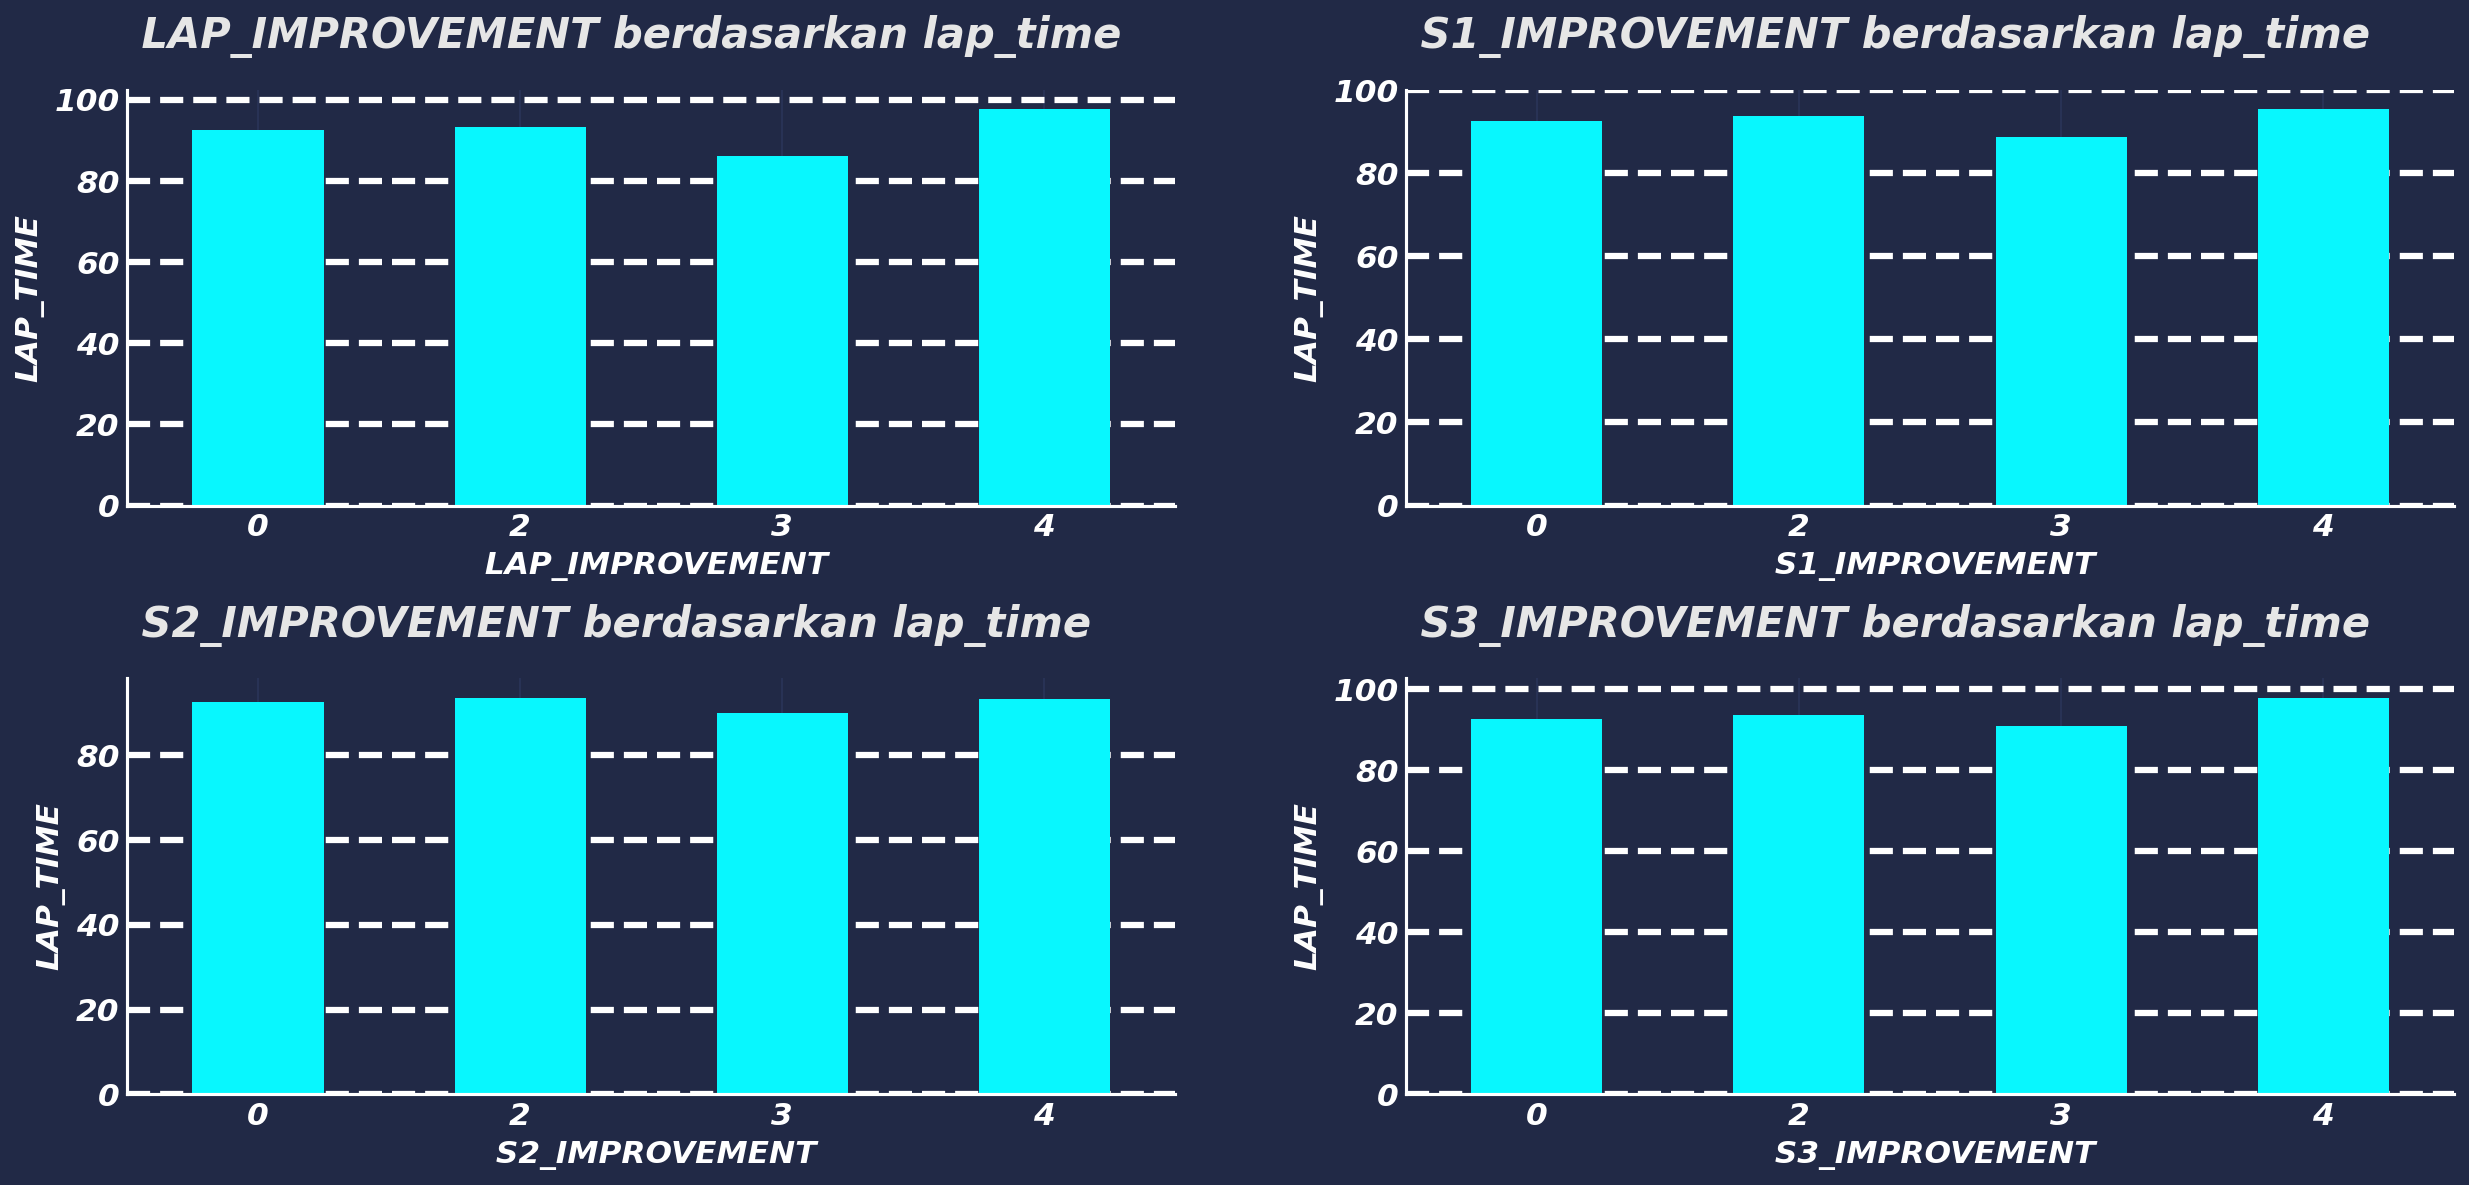

In [61]:
all_imp = [" LAP_IMPROVEMENT", " S1_IMPROVEMENT", " S2_IMPROVEMENT"," S3_IMPROVEMENT"]

for i,j in enumerate(all_imp): 
    plt.subplot(2, 2, i+1) 
    train.groupby(j)["LAP_TIME"].mean().plot(kind="bar", figsize=(17, 8)) 
    plt.grid(axis="y", linewidth=3, linestyle="--", color="white") 
    plt.title(j + " berdasarkan lap_time")
    plt.xlabel(j) 
    plt.xticks(rotation=0) 
    plt.ylabel("LAP_TIME")
    
plt.tight_layout() 

In [71]:
improv = train[[" LAP_IMPROVEMENT", " S1_IMPROVEMENT", " S2_IMPROVEMENT", " S3_IMPROVEMENT"]].mean(axis=1) 

In [72]:
improv

0        0.0
1        2.0
2        0.0
3        0.0
4        0.0
        ... 
10271    0.0
10272    0.0
10273    0.0
10274    2.0
10275    0.0
Length: 10276, dtype: float64

In [74]:
improv.value_counts()

0.00    9270
2.00     384
0.50     217
1.50     171
1.00      89
2.25      54
2.50      38
1.75      13
3.00      12
2.75      10
3.50       6
4.00       4
1.25       3
3.25       2
0.75       2
3.75       1
dtype: int64

In [75]:
# rata² lap time  berdasarakn improvement

train.groupby(improv)["LAP_TIME"].mean().sort_values().to_frame().style.bar("LAP_TIME", color="red") 

,LAP_TIME
3.75,74.000000
2.75,82.000000
1.25,84.666667
0.75,86.500000
4.0,87.000000
1.75,89.461538
2.25,91.333333
1.0,91.404494
1.5,92.356725
0.0,92.524919


In [28]:
# rata² kan semua improvement 
# karena mempunyai distribution yang sama 

for i in [train, test]: 
    i["ALL_IMPROVEMENT"] = i[[" LAP_IMPROVEMENT", " S1_IMPROVEMENT", " S2_IMPROVEMENT", " S3_IMPROVEMENT"]].mean(axis=1) 

In [29]:
imp = [" LAP_IMPROVEMENT"," S1_IMPROVEMENT"," S2_IMPROVEMENT", " S3_IMPROVEMENT"]

for i in [train, test]: 
    i.drop(imp, axis=1, inplace=True) 

## kph

skew: -1.3400745674266585
Kurt: 1.0115852747610377


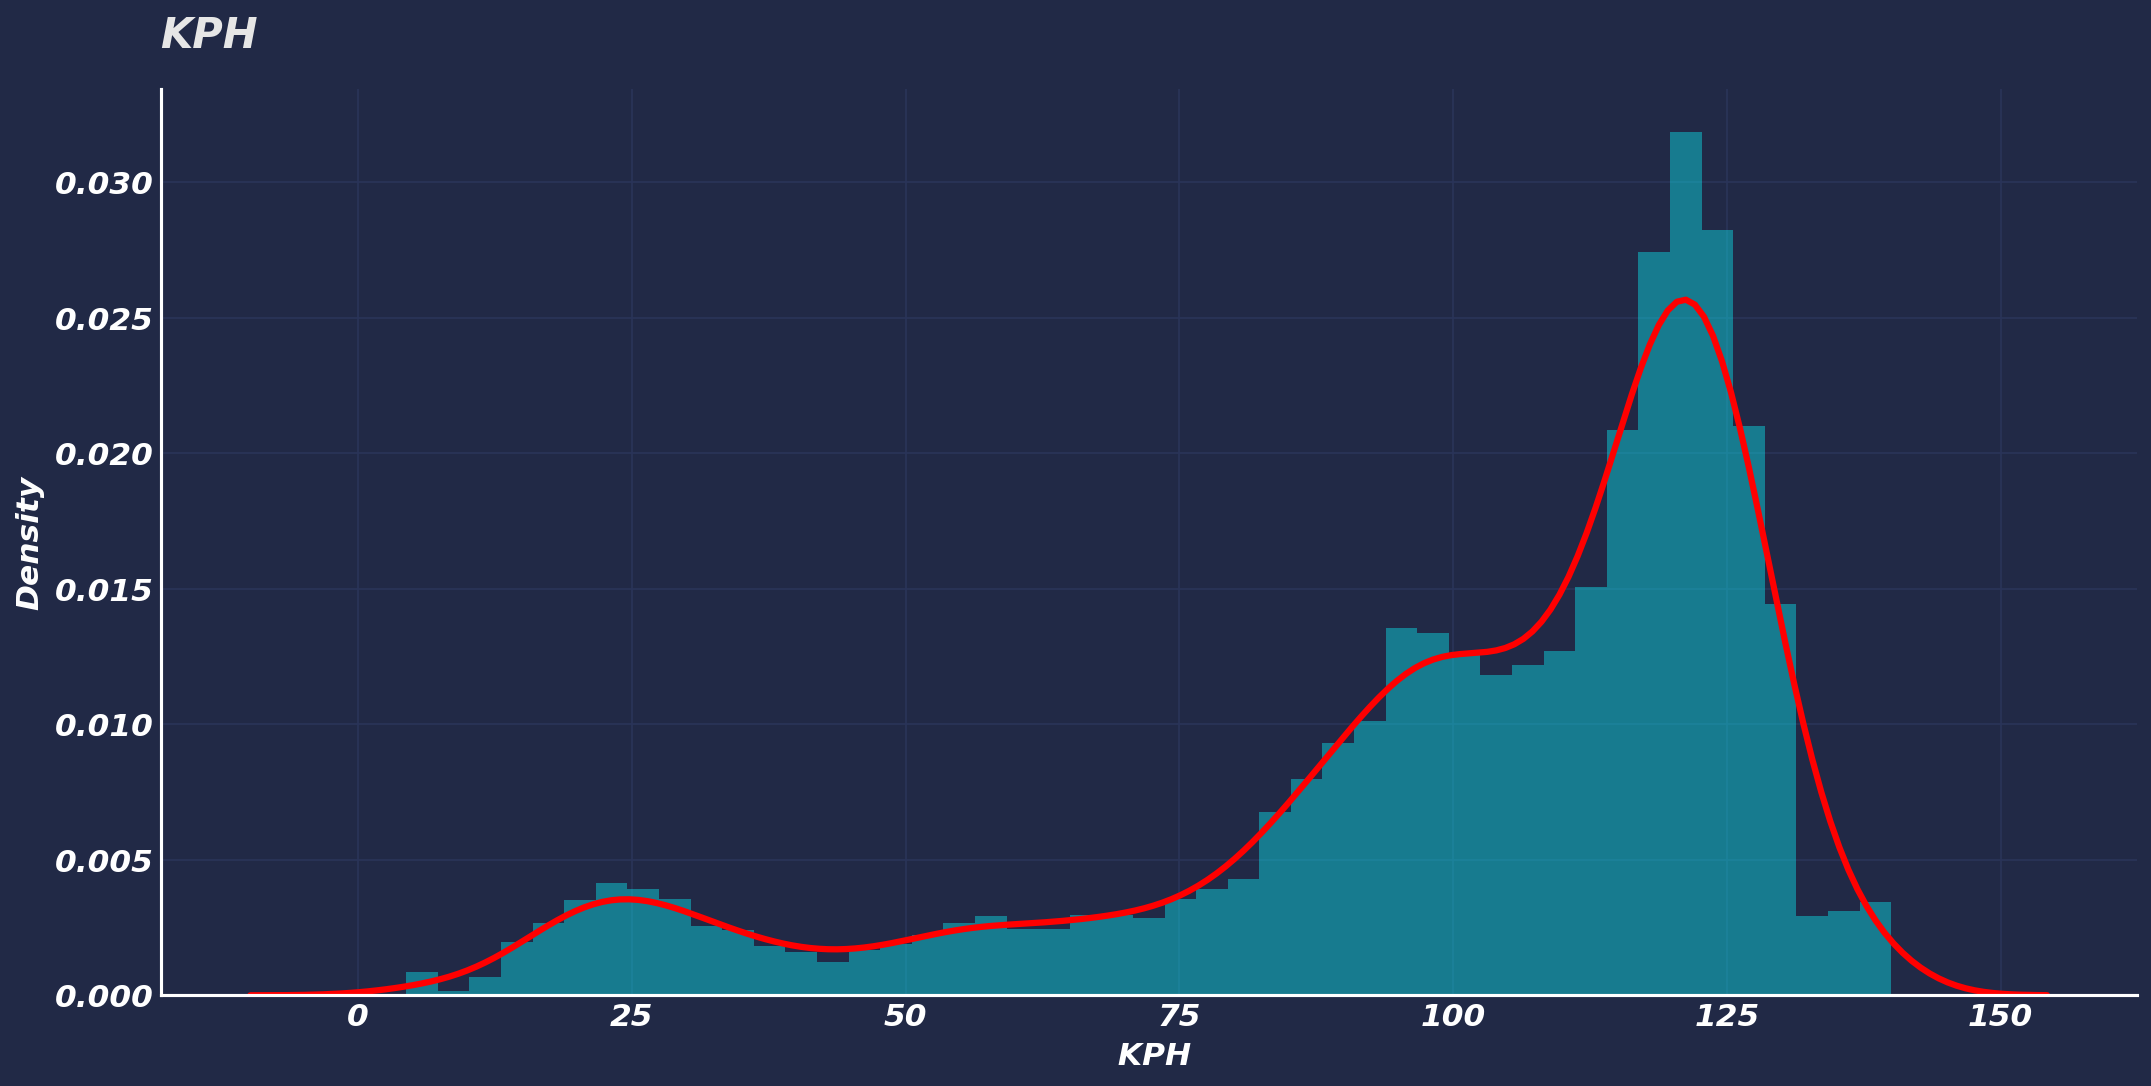

In [82]:
plt.figure(figsize=(17,8)) 

sns.distplot(train[" KPH"], kde_kws={"linewidth": 3,"color": "red"})
plt.title("KPH")

print(f"skew: {train[' KPH'].skew() }") 
print(f"Kurt: {train[' KPH'].kurt() }") 

Text(0.0, 1.0, ' correlation kph & lap time')

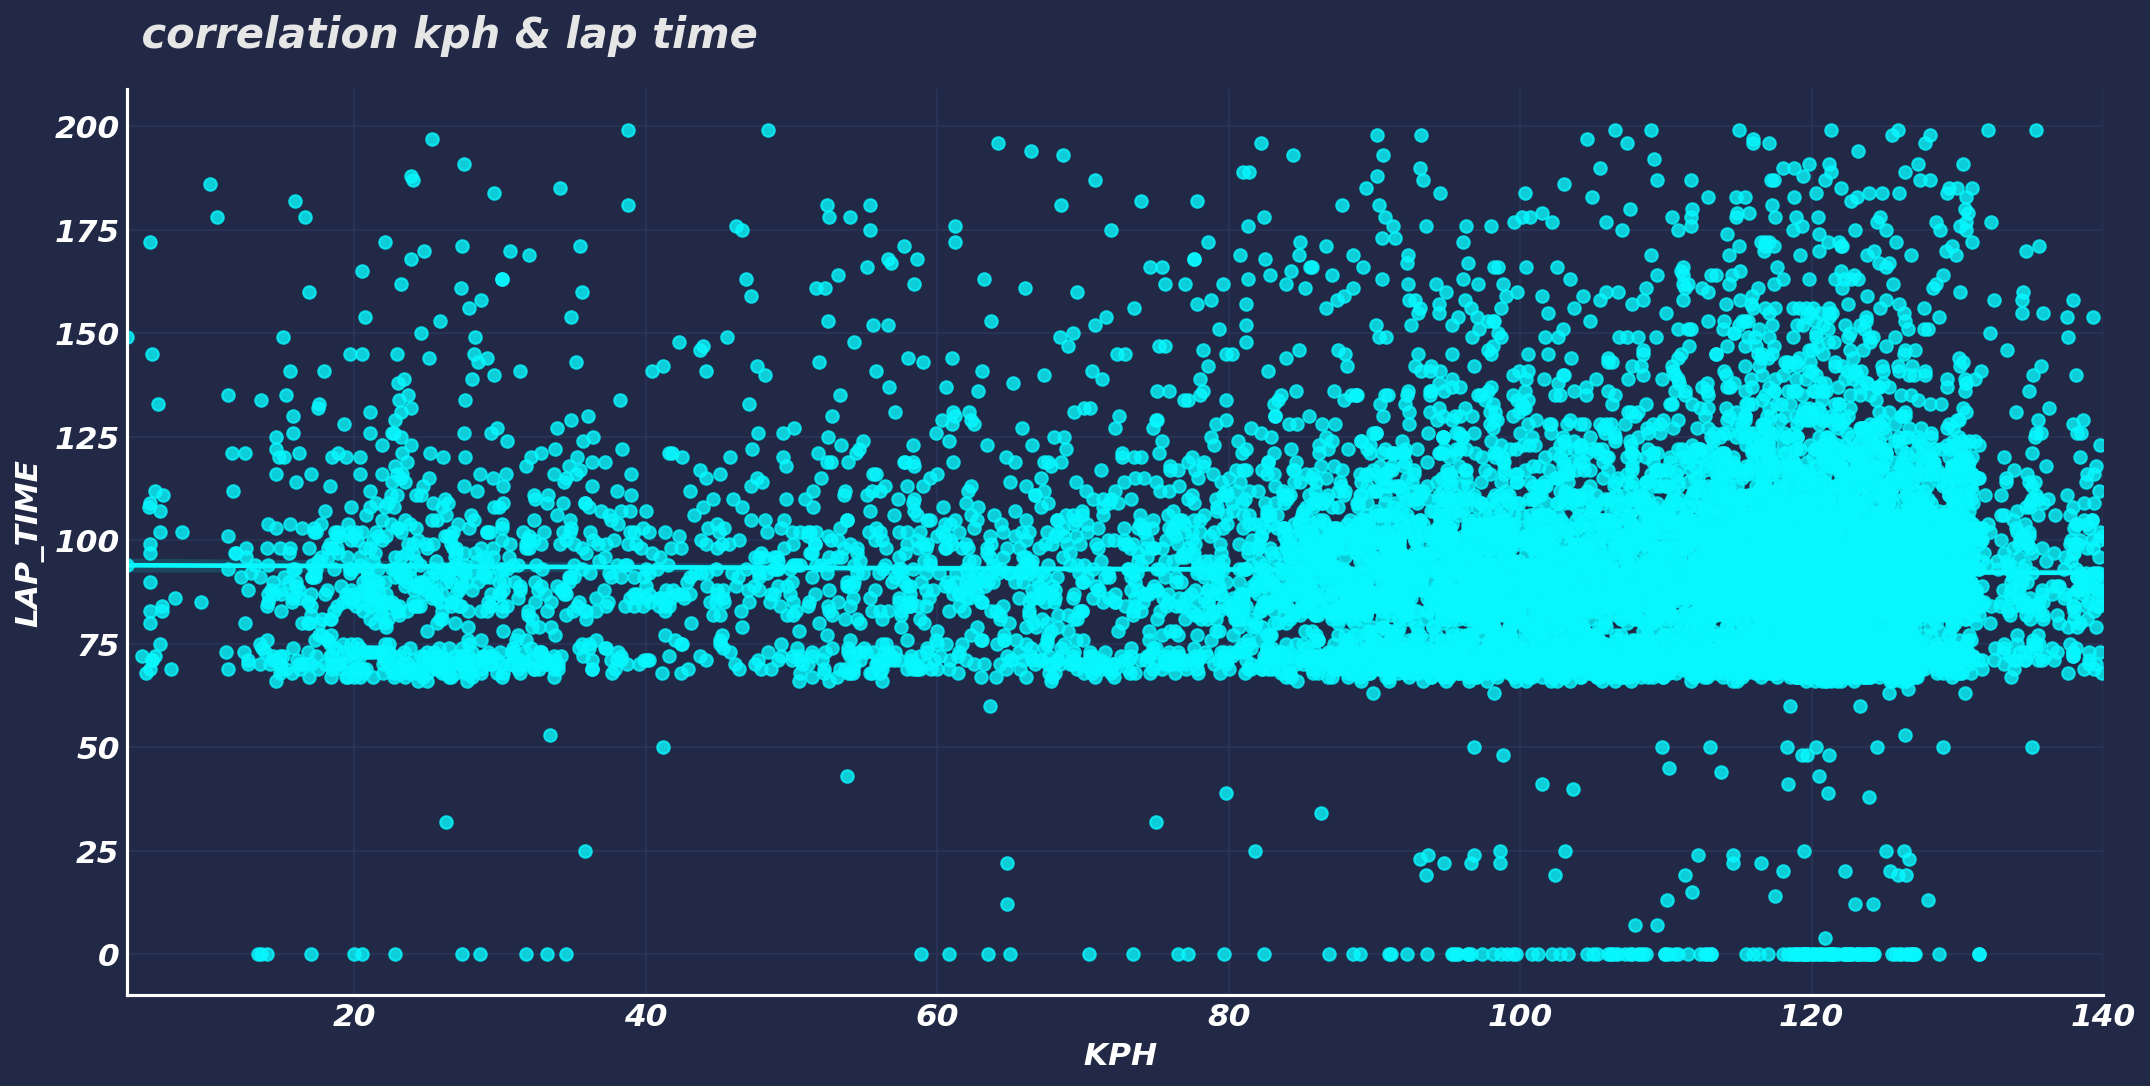

In [84]:
# check correlation between lap time & kph

plt.figure(figsize=(17, 8)) 

sns.regplot(x=train[" KPH"], y = train["LAP_TIME"])
plt.title(" correlation kph & lap time") 

## group

In [85]:
train.GROUP.value_counts()

4.0    137
3.0    129
2.0    122
1.0    120
Name: GROUP, dtype: int64

In [86]:
# filter event dgn nilai group 

train.groupby("GROUP")["EVENT"].value_counts().to_frame() 

,,EVENT
GROUP,EVENT,
1.0,Qualifying Group 1,120
2.0,Qualifying Group 2,122
3.0,Qualifying Group 3,129
4.0,Qualifying Group 4,137


In [30]:
# fillna group with none

for i in [train, test]: 
    i["GROUP"].fillna("none", inplace=True) 

In [31]:
grp = {4.0:"4",3.0:"3",2.0:"2"
       ,1.0:"1"}

for i in [train, test]: 
    i["GROUP"] = i["GROUP"].replace(grp) 

In [32]:
# after fillna

train.GROUP.value_counts()

none    9768
4        137
3        129
2        122
1        120
Name: GROUP, dtype: int64

In [103]:
# rata² lap time berdasarakn group 

train.groupby("GROUP")["LAP_TIME"].mean().sort_values().to_frame().style.bar("LAP_TIME", color="red") 

,LAP_TIME
GROUP,
none,92.421478
3,96.023256
4,96.218978
2,98.901639
1,98.983333


## power

In [104]:
train.POWER.value_counts(dropna=False)

NaN      7373
250.0    1989
235.0     914
Name: POWER, dtype: int64

In [110]:
# check hubungan antara power dan teateam

train.groupby("DRIVER")["POWER"].value_counts() 

DRIVER     POWER
ACO_13     250.0    94
           235.0    37
ALOTTE_36  250.0    72
           235.0    44
AL_94      250.0    86
           235.0    34
AS_29      250.0    93
           235.0    34
EMORT_48   250.0    73
           235.0    36
JVER_25    250.0    86
           235.0    42
J_27       250.0    97
           235.0    35
J_6        250.0    38
           235.0    26
LGRA_11    250.0    89
           235.0    26
MEV_20     250.0    81
           235.0    44
M¬úNT_28   250.0    93
           235.0    45
NN_71      250.0    88
           235.0    33
NVR_17     250.0    86
           235.0    51
N_37       250.0    81
           235.0    25
N¬úL_6     250.0    43
           235.0    25
OROWL_22   250.0    93
           235.0    42
OTUR_8     250.0    68
           235.0    36
PWEHRL_99  250.0    76
           235.0    51
RFRI_4     250.0    86
           235.0    18
RR_33      250.0    82
           235.0    23
SBU_23     250.0    83
           235.0    40
SB_10      250.0 

In [120]:
# filter yang punya power dan tidak 

power = np.where(train.POWER.isnull(),0,1)

In [123]:
np.unique(power, return_counts=True)
#output
# 0 = 7373
# 1 = 2930

(array([0, 1]), array([7373, 2903]))

In [33]:
#  buat feature baru 
for i in [train,test]:
    i["POWER?"] = np.where(i["POWER"].isnull(), "no","yes")
    

In [34]:
train["POWER?"].value_counts()

no     7373
yes    2903
Name: POWER?, dtype: int64

In [35]:
# drop power 

for i in [train, test]:
    i.drop("POWER", axis=1, inplace=True) 

## all weather

In [38]:
weather = ["AIR_TEMP","TRACK_TEMP","HUMIDITY","WIND_SPEED","WIND_DIRECTION","LAP_TIME"]

corr = np.triu(train[weather].corr()) 



In [45]:
# check skewnes & kurtosis 

for i in train[weather].iloc[:,:5]: 
    print(i) 
    print(f"skew: {train[i].skew()}") 
    print(f"Kurt: {train[i].kurt()}\n") 

AIR_TEMP
skew: -0.6012879410718669
Kurt: -1.2130286484445345

TRACK_TEMP
skew: -0.5794306708594159
Kurt: -1.3032858211815004

HUMIDITY
skew: -0.9022126844760103
Kurt: -0.3883193310020565

WIND_SPEED
skew: 0.8755795965105595
Kurt: 0.43153201929467633

WIND_DIRECTION
skew: 0.050627581201223584
Kurt: -0.9151612151493058



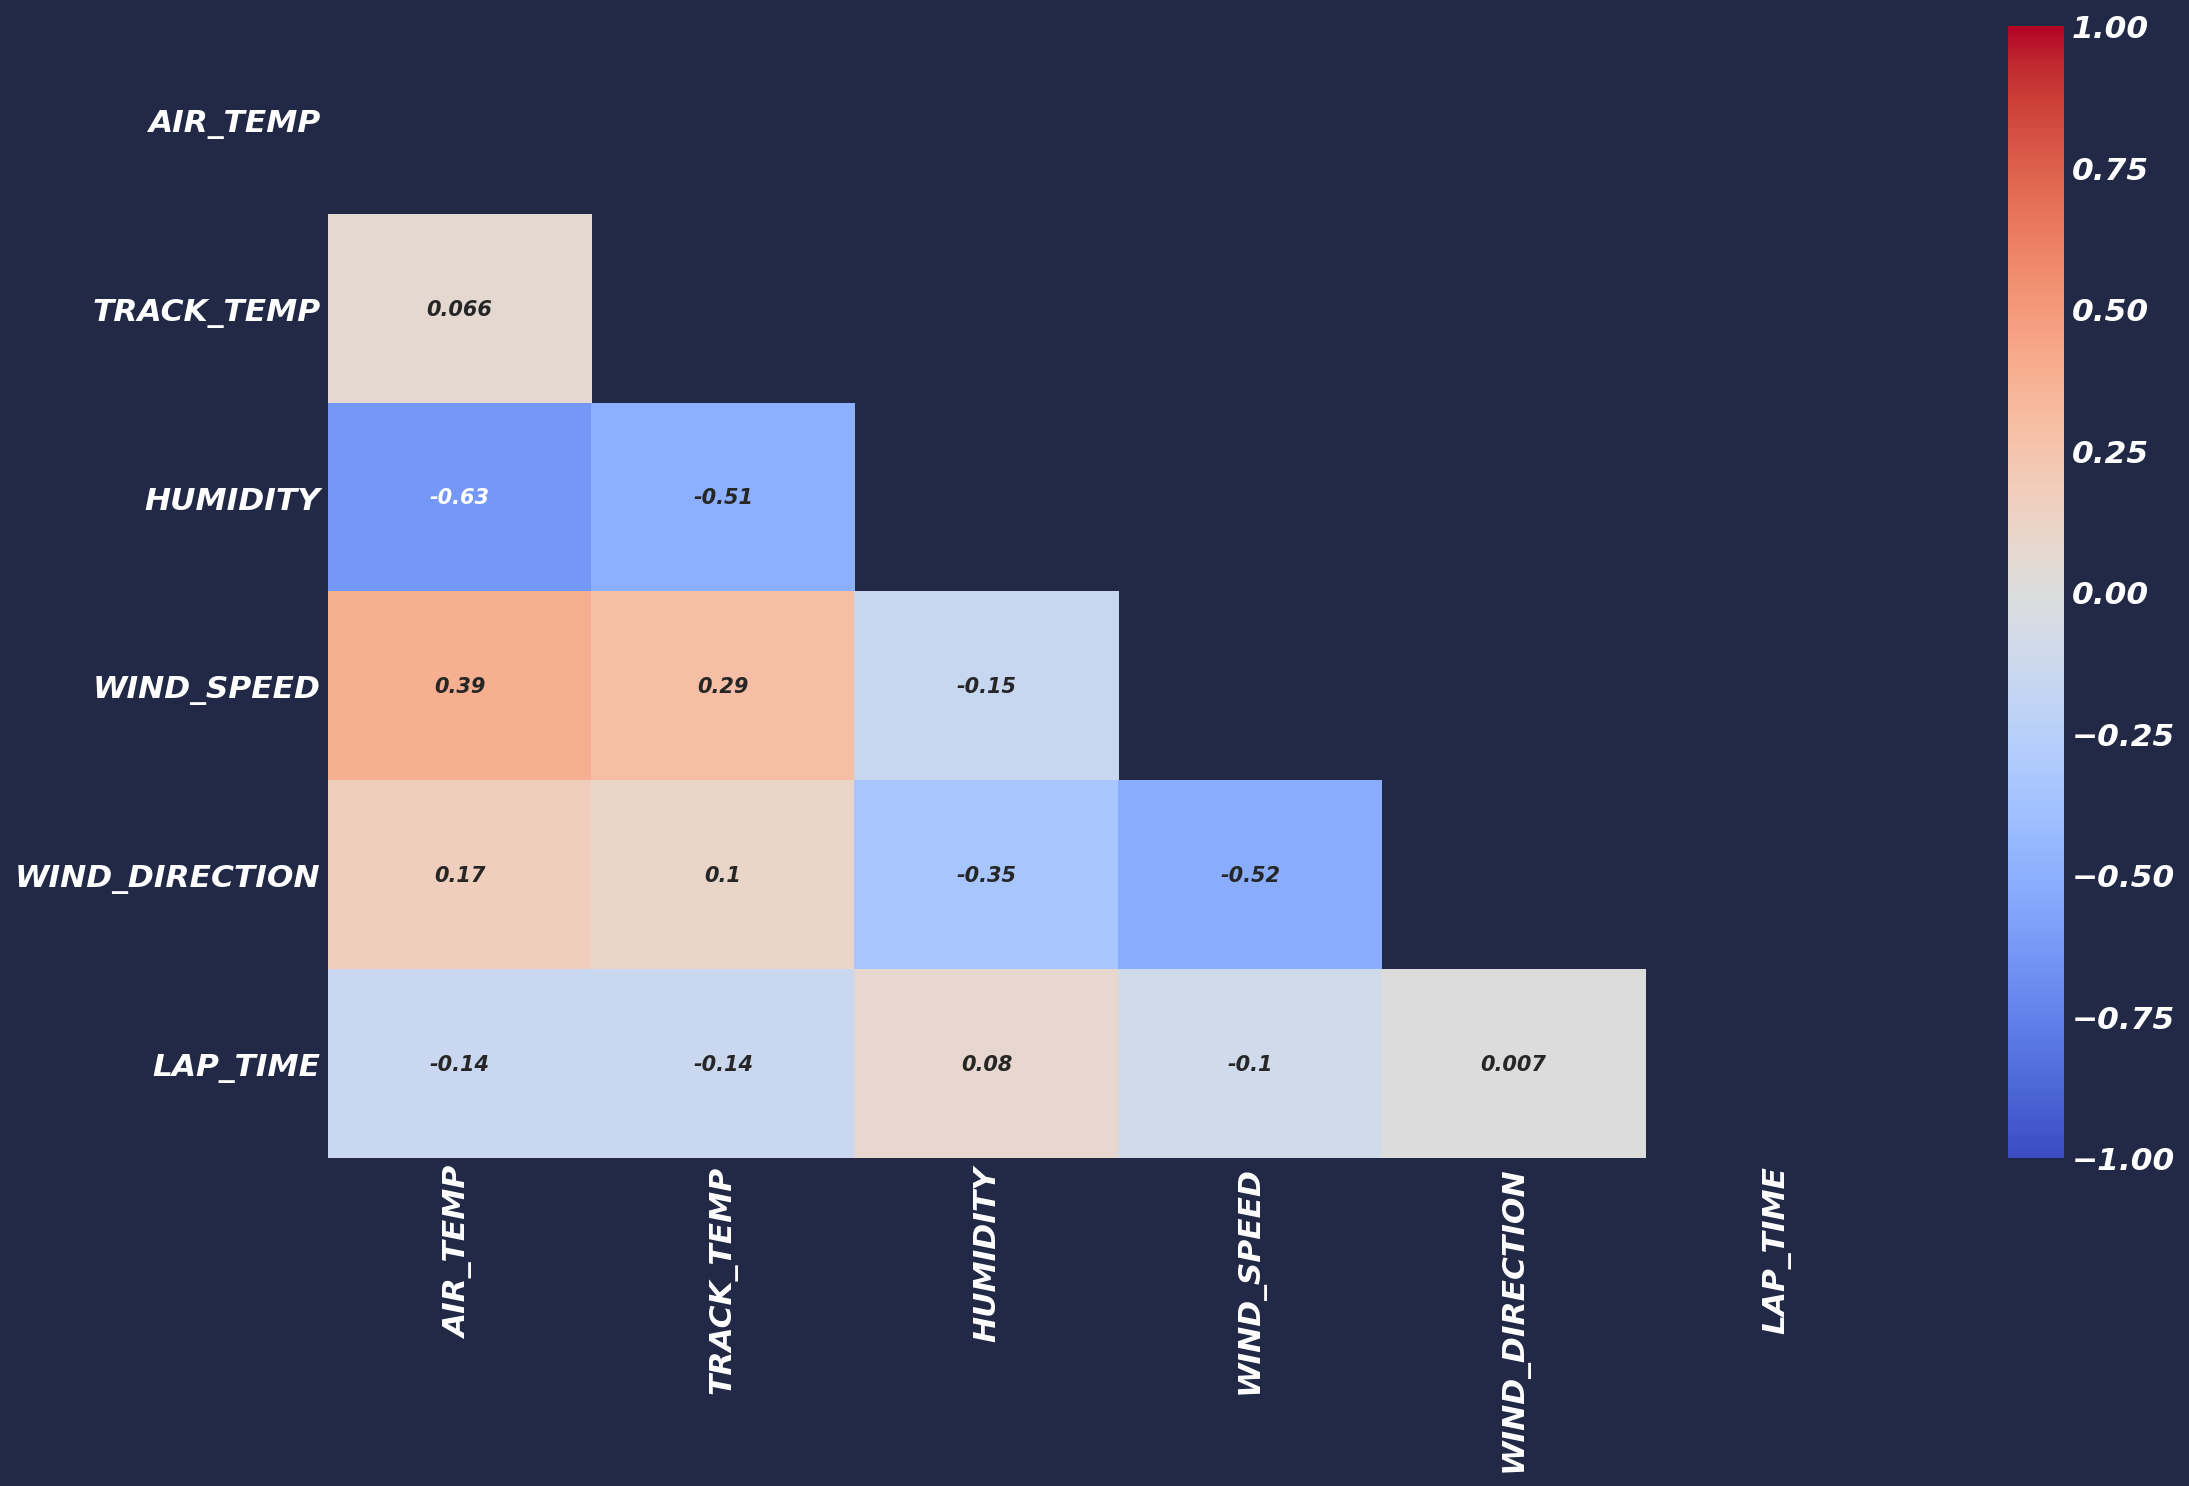

In [41]:
# liat correlation weather feature

plt.figure(figsize=(17, 10)) 

sns.heatmap(train[weather].corr(), mask=corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1) 

In [48]:
train.head()

,LAP_NUMBER,LAP_TIME,KPH,ELAPSED,HOUR,S1_LARGE,S2_LARGE,S3_LARGE,GROUP,TEAM,LOCATION,EVENT,AIR_TEMP,TRACK_TEMP,HUMIDITY,WIND_SPEED,WIND_DIRECTION,RAIN,PIT?,DRIVER,ALL_IMPROVEMENT,POWER?
0,1,92,28.8,07:02.0,22:02.0,05:43.3,00:35.4,00:43.3,none,JR,Location 2,Free Practice 2,12,12,65,2,149.0,-1,yes,SB_10,0.0,no
1,2,87,120.5,08:43.0,23:43.0,00:25.7,00:33.4,00:41.9,none,JR,Location 2,Free Practice 2,12,12,65,2,149.0,-1,no,SB_10,2.0,no
2,3,73,101.9,10:42.5,25:42.5,00:28.1,00:34.1,00:57.2,none,JR,Location 2,Free Practice 2,12,12,65,2,149.0,-1,no,SB_10,0.0,no
3,1,73,75.9,02:40.2,17:40.2,01:05.0,00:38.4,00:56.8,none,AD,Location 2,Free Practice 2,12,12,65,2,149.0,-1,yes,LGRA_11,0.0,no
4,2,73,111.2,04:29.7,19:29.7,00:28.0,00:36.7,00:44.7,none,AD,Location 2,Free Practice 2,12,12,65,2,149.0,-1,no,LGRA_11,0.0,no


In [ ]:
# final

In [50]:
print(train.shape) 
print(test.shape) 
print(" ") 
print(train.duplicated().any().sum()) 
##

(10276, 22)
(420, 22)
 
0


In [52]:
#buat file baru 
train.to_csv("train_dir(clean).csv",index=False)
test.to_csv("test_dir(clean).csv",index=False) 
